# Road shoes

In [1]:
import pandas as pd

df_ori = pd.read_csv('../../data/SONIX utilities - Road.csv')
print(df_ori.head())

    Brand         Name  Audience score Price                Pace Arch support  \
0  Brooks     Launch 9   87\r\n Great!  $110  Daily runningTempo      Neutral   
1  Brooks   Levitate 6  90\r\n Superb!  $150       Daily running      Neutral   
2  Adidas        4DFWD  90\r\n Superb!  $200       Daily running      Neutral   
3  Adidas      4DFWD 2  90\r\n Superb!  $200       Daily running      Neutral   
4  Adidas      4DFWD 3   88\r\n Great!  $200       Daily running      Neutral   

         Weight lab Weight brand  Lightweight Drop lab Drop brand  \
0    7.9 oz / 225g 8.1 oz / 230g            1      9.4 mm 10.0 mm   
1  10.7 oz / 304g 10.9 oz / 309g            0       7.7 mm 8.0 mm   
2  11.9 oz / 336g 11.5 oz / 327g            0      8.9 mm 10.0 mm   
3  12.6 oz / 356g 12.4 oz / 352g            0     10.6 mm 11.0 mm   
4  12.3 oz / 348g 12.2 oz / 345g            0      9.9 mm 10.0 mm   

     Strike pattern  ... Heel lab Heel brand Forefoot lab Forefoot brand  \
0  HeelMid/forefoot  .

In [2]:
print(len(df_ori))
print(df_ori.info())

1170
<class 'pandas.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Brand                        1170 non-null   str  
 1   Name                         1170 non-null   str  
 2   Audience score               1164 non-null   str  
 3   Price                        1170 non-null   str  
 4   Pace                         1170 non-null   str  
 5   Arch support                 1170 non-null   str  
 6   Weight lab Weight brand      1170 non-null   str  
 7   Lightweight                  1170 non-null   int64
 8   Drop lab Drop brand          1170 non-null   str  
 9   Strike pattern               1170 non-null   str  
 10  Size                         1170 non-null   str  
 11  Midsole softness             1170 non-null   str  
 12  Toebox durability            1170 non-null   str  
 13  Heel padding durability      1170 non-null   str  
 14

# Pre-EDA

In [3]:
# Remove unnecessary columns that we got from RunRepeat
df_ori.drop(columns=['Audience score', 'Price', 'Gender', 'Terrain', 'Ranking', 'Popularity'], inplace=True)
df_ori.info()

<class 'pandas.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Brand                        1170 non-null   str  
 1   Name                         1170 non-null   str  
 2   Pace                         1170 non-null   str  
 3   Arch support                 1170 non-null   str  
 4   Weight lab Weight brand      1170 non-null   str  
 5   Lightweight                  1170 non-null   int64
 6   Drop lab Drop brand          1170 non-null   str  
 7   Strike pattern               1170 non-null   str  
 8   Size                         1170 non-null   str  
 9   Midsole softness             1170 non-null   str  
 10  Toebox durability            1170 non-null   str  
 11  Heel padding durability      1170 non-null   str  
 12  Outsole durability           1170 non-null   str  
 13  Breathability                1170 non-null   str  
 14  Wid

In [4]:
# Naming convention: all to lowercase
df_ori.columns = df_ori.columns.str.strip().str.lower()
df_ori = df_ori.map(lambda x: x.strip().lower() if isinstance(x, str) else x)

print(df_ori)

       brand                    name                pace arch support  \
0     brooks                launch 9  daily runningtempo      neutral   
1     brooks              levitate 6       daily running      neutral   
2     adidas                   4dfwd       daily running      neutral   
3     adidas                 4dfwd 2       daily running      neutral   
4     adidas                 4dfwd 3       daily running      neutral   
...      ...                     ...                 ...          ...   
1165    nike         zoomx streakfly               tempo      neutral   
1166    nike         zoomx streakfly               tempo      neutral   
1167    nike         zoomx streakfly               tempo      neutral   
1168    nike         zoomx streakfly               tempo      neutral   
1169    nike  zoomx vaporfly next% 2         competition      neutral   

            weight lab weight brand  lightweight drop lab drop brand  \
0       7.9 oz / 225g 8.1 oz / 230g            1   

In [5]:
dup_mask = df_ori.duplicated(subset=["brand", "name"], keep="first")
print(len(dup_mask))
df_ori.loc[dup_mask, ["brand", "name"]].head(100)

1170


brand            name
5    adidas         4dfwd 3
11   adidas       adistar 3
12   adidas       adistar 3
13   adidas       adistar 3
14   adidas       adistar 3
..      ...             ...
163      on    cloudflyer 5
164      on    cloudflyer 5
166      on         cloudgo
169      on  cloudmonster 2
170      on  cloudmonster 2

[100 rows x 2 columns]

In [6]:
# sebelum hapus
print("Before:", len(df_ori))

#hapus
df_ori = df_ori.drop_duplicates(subset=["brand", "name"], keep="first").reset_index(drop=True)

print("After :", len(df_ori))
df_ori.head()

Before: 1170
After : 433


brand        name                pace arch support  \
0  brooks    launch 9  daily runningtempo      neutral   
1  brooks  levitate 6       daily running      neutral   
2  adidas       4dfwd       daily running      neutral   
3  adidas     4dfwd 2       daily running      neutral   
4  adidas     4dfwd 3       daily running      neutral   

         weight lab weight brand  lightweight drop lab drop brand  \
0    7.9 oz / 225g 8.1 oz / 230g            1      9.4 mm 10.0 mm   
1  10.7 oz / 304g 10.9 oz / 309g            0       7.7 mm 8.0 mm   
2  11.9 oz / 336g 11.5 oz / 327g            0      8.9 mm 10.0 mm   
3  12.6 oz / 356g 12.4 oz / 352g            0     10.6 mm 11.0 mm   
4  12.3 oz / 348g 12.2 oz / 345g            0      9.9 mm 10.0 mm   

     strike pattern            size midsole softness  ... torsional rigidity  \
0  heelmid/forefoot    true to size         balanced  ...              stiff   
1      mid/forefoot    true to size             soft  ...           moderate   
2  heelmid/forefoot    true to size             firm  ...           flexible   
3              heel  slightly small             firm  ...           flexible   
4  heelmid/forefoot    true to size             firm  ...           flexible   

  heel counter stiffness plate rocker heel lab heel brand  \
0               flexible     0      0     32.4 mm 36.0 mm   
1               moderate     0      0     34.3 mm 32.5 mm   
2               flexible     0      0     33.3 mm 32.5 mm   
3               moderate     0      0     31.8 mm 32.0 mm   
4               flexible     0      0     32.6 mm 34.0 mm   

  forefoot lab forefoot brand widths available orthotic friendly  \
0             23.0 mm 26.0 mm       normalwide                 1   
1             26.6 mm 24.5 mm           normal                 1   
2             24.4 mm 22.5 mm           normal                 1   
3             21.2 mm 21.0 mm           normal                 1   
4             22.7 mm 24.0 mm           normal                 1   

              season removable insole  
0                  -                1  
1  summerall seasons                1  
2        all seasons                1  
3        all seasons                1  
4        all seasons                1  

[5 rows x 27 columns]

In [7]:
# Searching for duplicate technical specifications
tech_columns = df_ori.columns[2:].tolist()
duplicates = df_ori[df_ori.duplicated(subset=tech_columns, keep=False)]

duplicates_sorted = duplicates.sort_values(by=tech_columns[:3])

print(f"Ditemukan {len(duplicates_sorted)} baris yang memiliki spesifikasi identik.\n")
print(duplicates_sorted[['brand', 'name'] + tech_columns[:3]].head(30))

Ditemukan 9 baris yang memiliki spesifikasi identik.

           brand                   name                pace arch support  \
40          nike             alphafly 3         competition      neutral   
285         nike        nike alphafly 3         competition      neutral   
119  new balance         foam arishi v4       daily running      neutral   
127  new balance   fresh foam arishi v4       daily running      neutral   
281       mizuno  mizuno wave horizon 7       daily running    stability   
406       mizuno         wave horizon 7       daily running    stability   
424       mizuno        wwave horizon 7       daily running    stability   
6         adidas     adidas adizero sl2  daily runningtempo      neutral   
23        adidas            adizero sl2  daily runningtempo      neutral   

           weight lab weight brand  
40       7.1 oz / 201g 7 oz / 198g  
285      7.1 oz / 201g 7 oz / 198g  
119    8.5 oz / 242g 8.7 oz / 246g  
127    8.5 oz / 242g 8.7 oz / 246g  


In [8]:
# sebelum hapus
print("Before:", len(df_ori))

#hapus
df_ori = df_ori.drop_duplicates(subset=tech_columns, keep='first').copy()

print("After :", len(df_ori))
df_ori.head()

Before: 433
After : 428


brand        name                pace arch support  \
0  brooks    launch 9  daily runningtempo      neutral   
1  brooks  levitate 6       daily running      neutral   
2  adidas       4dfwd       daily running      neutral   
3  adidas     4dfwd 2       daily running      neutral   
4  adidas     4dfwd 3       daily running      neutral   

         weight lab weight brand  lightweight drop lab drop brand  \
0    7.9 oz / 225g 8.1 oz / 230g            1      9.4 mm 10.0 mm   
1  10.7 oz / 304g 10.9 oz / 309g            0       7.7 mm 8.0 mm   
2  11.9 oz / 336g 11.5 oz / 327g            0      8.9 mm 10.0 mm   
3  12.6 oz / 356g 12.4 oz / 352g            0     10.6 mm 11.0 mm   
4  12.3 oz / 348g 12.2 oz / 345g            0      9.9 mm 10.0 mm   

     strike pattern            size midsole softness  ... torsional rigidity  \
0  heelmid/forefoot    true to size         balanced  ...              stiff   
1      mid/forefoot    true to size             soft  ...           moderate   
2  heelmid/forefoot    true to size             firm  ...           flexible   
3              heel  slightly small             firm  ...           flexible   
4  heelmid/forefoot    true to size             firm  ...           flexible   

  heel counter stiffness plate rocker heel lab heel brand  \
0               flexible     0      0     32.4 mm 36.0 mm   
1               moderate     0      0     34.3 mm 32.5 mm   
2               flexible     0      0     33.3 mm 32.5 mm   
3               moderate     0      0     31.8 mm 32.0 mm   
4               flexible     0      0     32.6 mm 34.0 mm   

  forefoot lab forefoot brand widths available orthotic friendly  \
0             23.0 mm 26.0 mm       normalwide                 1   
1             26.6 mm 24.5 mm           normal                 1   
2             24.4 mm 22.5 mm           normal                 1   
3             21.2 mm 21.0 mm           normal                 1   
4             22.7 mm 24.0 mm           normal                 1   

              season removable insole  
0                  -                1  
1  summerall seasons                1  
2        all seasons                1  
3        all seasons                1  
4        all seasons                1  

[5 rows x 27 columns]

In [9]:
# Last Verification of Duplicates
df_ori['brand_name'] = df_ori['brand'] + ' ' + df_ori['name']
dup_brand_name = df_ori[df_ori.duplicated(subset=['brand_name'], keep=False)]
dup_tech = df_ori[df_ori.duplicated(subset=tech_columns, keep=False)]

print(f"=== HASIL VERIFIKASI ===")
print(f"1. Total baris dengan 'brand_name' yang sama: {len(dup_brand_name)}")
print(f"2. Total baris dengan spesifikasi yang sama: {len(dup_tech)}")

=== HASIL VERIFIKASI ===
1. Total baris dengan 'brand_name' yang sama: 0
2. Total baris dengan spesifikasi yang sama: 0


In [10]:
df_ori.drop(columns=['brand_name'], inplace=True)
df_ori.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   brand                        428 non-null    str  
 1   name                         428 non-null    str  
 2   pace                         428 non-null    str  
 3   arch support                 428 non-null    str  
 4   weight lab weight brand      428 non-null    str  
 5   lightweight                  428 non-null    int64
 6   drop lab drop brand          428 non-null    str  
 7   strike pattern               428 non-null    str  
 8   size                         428 non-null    str  
 9   midsole softness             428 non-null    str  
 10  toebox durability            428 non-null    str  
 11  heel padding durability      428 non-null    str  
 12  outsole durability           428 non-null    str  
 13  breathability                428 non-null    str  
 14  width / fi

In [11]:
pre_eda_df = df_ori.copy()
len(pre_eda_df)

428

# EDA (Exploratory Data Analysis)

## Brand

In [12]:
df = pre_eda_df.copy()

In [13]:
print(df['brand'].value_counts())

brand
asics           65
nike            54
adidas          53
brooks          51
saucony         39
new balance     37
hoka            21
altra           21
mizuno          19
on              16
under armour    10
salomon          7
skechers         6
reebok           6
puma             4
nobull           3
topo             3
diadora          3
xero             3
allbirds         3
jordan           1
inov8            1
apl              1
merrell          1
Name: count, dtype: int64


Terdapat kekhawatiran pada AI yang akan bias terhadap brand tertentu dikarenakan jumlah yang tidak seimbang. Untuk itu diperlukan pengecekan lanjutan pada hasil klasterisasi di akhir.

## Running Purposes

In [14]:
print(df['pace'].value_counts())

pace
daily running         294
daily runningtempo     53
tempo                  31
competition            30
competitiontempo       20
Name: count, dtype: int64


Terdapat sepatu yang memiliki multi-value pace yang berantakan

In [15]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3 

# encode base value
df['for_daily'] = df['pace'].str.contains('daily running').astype(int)
df['for_tempo'] = df['pace'].str.contains('tempo').astype(int)
df['for_competition'] = df['pace'].str.contains('competition').astype(int)


print("Jumlah Sepatu Per Kategori:")
print(f"Daily: {df['for_daily'].sum()}")
print(f"Tempo: {df['for_tempo'].sum()}")
print(f"Competition: {df['for_competition'].sum()}")

Jumlah Sepatu Per Kategori:
Daily: 347
Tempo: 104
Competition: 50


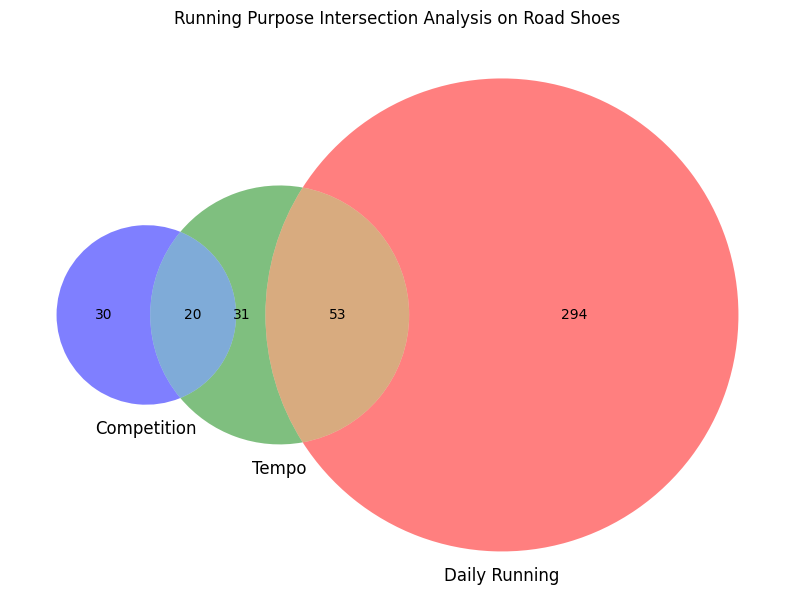

In [16]:
# Plotting intersection of each shoes
only_daily = len(df[(df['for_daily'] == 1) & (df['for_tempo'] == 0) & (df['for_competition'] == 0)])
only_tempo = len(df[(df['for_daily'] == 0) & (df['for_tempo'] == 1) & (df['for_competition'] == 0)])
only_comp  = len(df[(df['for_daily'] == 0) & (df['for_tempo'] == 0) & (df['for_competition'] == 1)])

daily_tempo = len(df[(df['for_daily'] == 1) & (df['for_tempo'] == 1) & (df['for_competition'] == 0)])
daily_comp  = len(df[(df['for_daily'] == 1) & (df['for_tempo'] == 0) & (df['for_competition'] == 1)])
tempo_comp  = len(df[(df['for_daily'] == 0) & (df['for_tempo'] == 1) & (df['for_competition'] == 1)])

all_three   = len(df[(df['for_daily'] == 1) & (df['for_tempo'] == 1) & (df['for_competition'] == 1)])

plt.figure(figsize=(10, 8))
venn3(subsets = (only_daily, only_tempo, daily_tempo, only_comp, daily_comp, tempo_comp, all_three),
      set_labels = ('Daily Running', 'Tempo', 'Competition'),
      alpha = 0.5)

plt.title("Running Purpose Intersection Analysis on Road Shoes")
plt.show()

Kebanyakan sepatu yang ada adalah daily running, dimana daily running adalah sepatu yang dibuat untuk kebutuhan lari sehari-hari, tempo adalah sepatu untuk kebutuhan latihan serius sebelum pertandingan, dan competition adalah sepatu yang digunakan oleh pelari untuk berkompetisi. 

Feature ini merupakan feature penting yang memerlukan input user langsung "Running Purpose" untuk mengetahui kebutuhan lari user.

In [17]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   brand                        428 non-null    str  
 1   name                         428 non-null    str  
 2   pace                         428 non-null    str  
 3   arch support                 428 non-null    str  
 4   weight lab weight brand      428 non-null    str  
 5   lightweight                  428 non-null    int64
 6   drop lab drop brand          428 non-null    str  
 7   strike pattern               428 non-null    str  
 8   size                         428 non-null    str  
 9   midsole softness             428 non-null    str  
 10  toebox durability            428 non-null    str  
 11  heel padding durability      428 non-null    str  
 12  outsole durability           428 non-null    str  
 13  breathability                428 non-null    str  
 14  width / fi

## Arch support

In [18]:
print(df['arch support'].value_counts())

arch support
neutral           366
stability          61
motion control      1
Name: count, dtype: int64


Diketahui terdapat 3 jenis arch support pada dataset, yaitu
- neutral : sepatunya dirancang untuk tipe kaki normal hingga high arch (kecenderungan lengkungan tinggi)
- stability : sepatunya dirancang untuk tipe kaki normal hingga low arch (kecenderungan lengkungan rendah)
- motion control : khusus untuk pemilik flat feet (kaki rata) atau yang mengalami severe overpronation (kondisi kaki yang miring ke dalam dengan sangat tajam).

Diambil data sebagai berikut dari website RunRepeat;
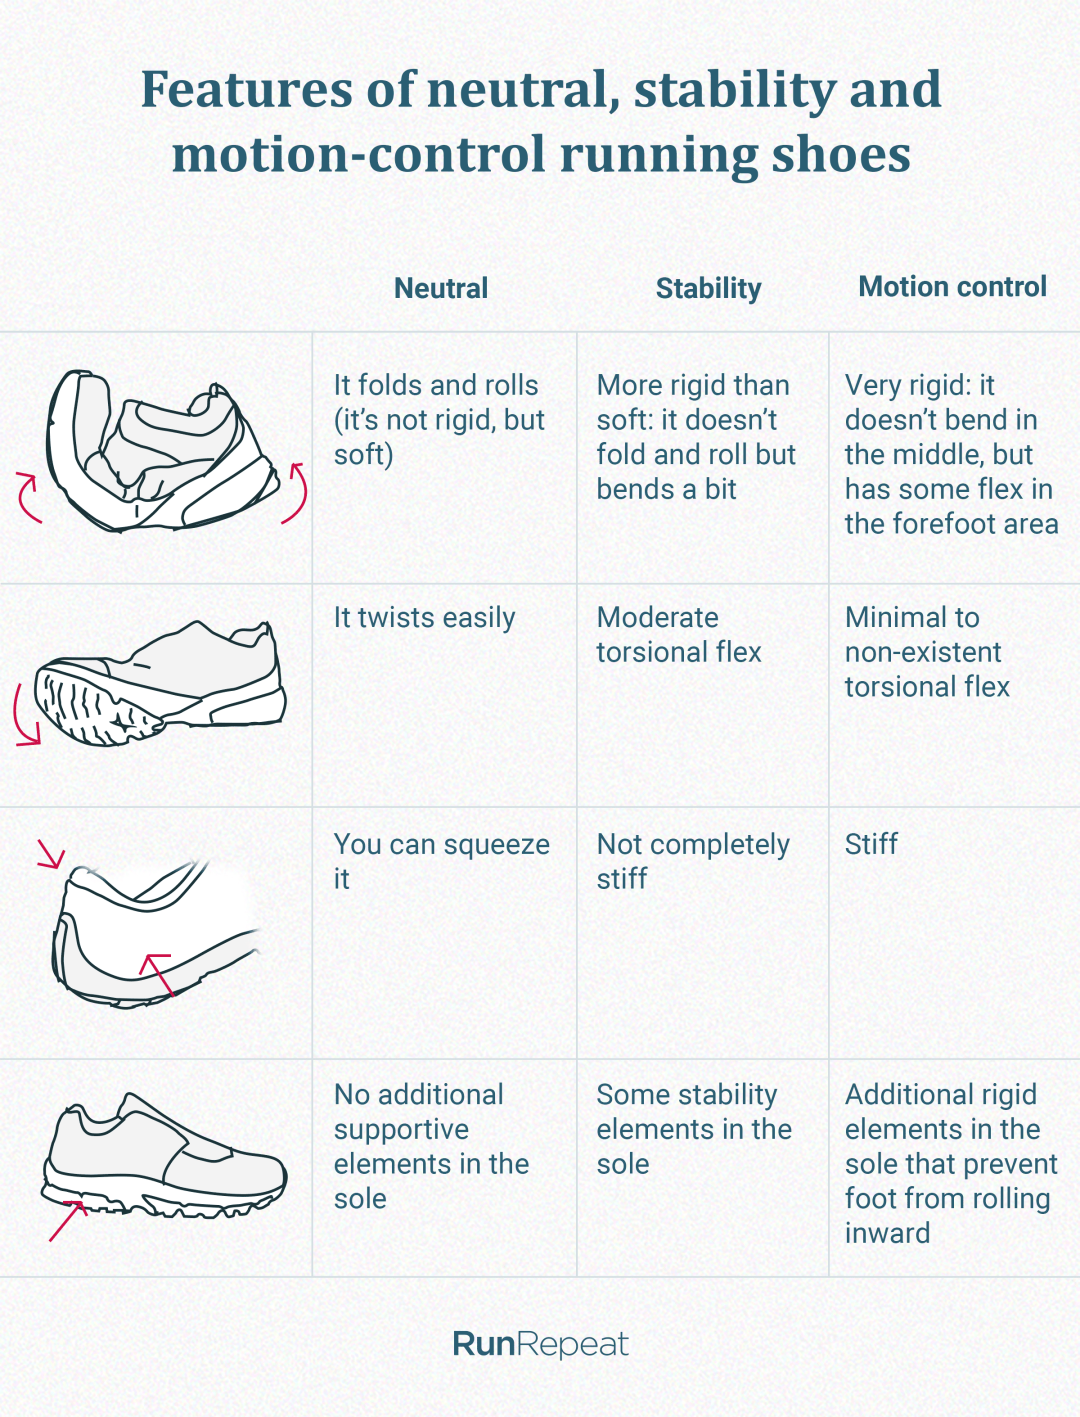

Yang perlu diperhatikan adalah bahwa hanya terdapat 1 buah sepatu dengan kategori motion control sehingga ke depannya sepatu jenis ini akan dimasukkan ke dalam kategori stability terlebih dahulu. Jika di masa yang akan mendatang ditemukan semakin banyak sepatu jenis ini, maka akan dilakukan pemisahan antara stability dan motion control.

Feature ini dipengaruhi oleh lengkungan pada kaki user sehingga diperlukan user input langsung berupa "Arch Type" untuk mengetahui sepatu yang cocok untuk mereka.

In [19]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   brand                        428 non-null    str  
 1   name                         428 non-null    str  
 2   pace                         428 non-null    str  
 3   arch support                 428 non-null    str  
 4   weight lab weight brand      428 non-null    str  
 5   lightweight                  428 non-null    int64
 6   drop lab drop brand          428 non-null    str  
 7   strike pattern               428 non-null    str  
 8   size                         428 non-null    str  
 9   midsole softness             428 non-null    str  
 10  toebox durability            428 non-null    str  
 11  heel padding durability      428 non-null    str  
 12  outsole durability           428 non-null    str  
 13  breathability                428 non-null    str  
 14  width / fi

## Weight lab weight brand

In [20]:
print(df['weight lab weight brand'].describe())
print(df['weight lab weight brand'].head())

count                             428
unique                            393
top       9.7 oz / 275g 9.7 oz / 275g
freq                                4
Name: weight lab weight brand, dtype: object
0      7.9 oz / 225g 8.1 oz / 230g
1    10.7 oz / 304g 10.9 oz / 309g
2    11.9 oz / 336g 11.5 oz / 327g
3    12.6 oz / 356g 12.4 oz / 352g
4    12.3 oz / 348g 12.2 oz / 345g
Name: weight lab weight brand, dtype: str


Karena RunRepeat sendiri biasanya melakukan penimbangan berat sepatu menggunakan satuan oz, maka untuk menyamaratakan berat di semua sepatu, ke depannya akan digunakan weight lab dengan satuan oz.

In [21]:
import seaborn as sns
import re

# extract ounces from the 'weight lab weight brand' column 
def extract_oz(text):
    if pd.isna(text): return None
    match = re.search(r'(\d+\.?\d*)\s*oz', str(text))
    return float(match.group(1)) if match else None

# extract and typecast to float
df['weight_lab_oz'] = df['weight lab weight brand'].apply(extract_oz).astype(float)

print(df[['weight lab weight brand', 'weight_lab_oz']].head())

         weight lab weight brand  weight_lab_oz
0    7.9 oz / 225g 8.1 oz / 230g            7.9
1  10.7 oz / 304g 10.9 oz / 309g           10.7
2  11.9 oz / 336g 11.5 oz / 327g           11.9
3  12.6 oz / 356g 12.4 oz / 352g           12.6
4  12.3 oz / 348g 12.2 oz / 345g           12.3


count    428.000000
mean       9.359112
std        1.370511
min        4.500000
25%        8.600000
50%        9.600000
75%       10.300000
max       12.600000
Name: weight_lab_oz, dtype: float64


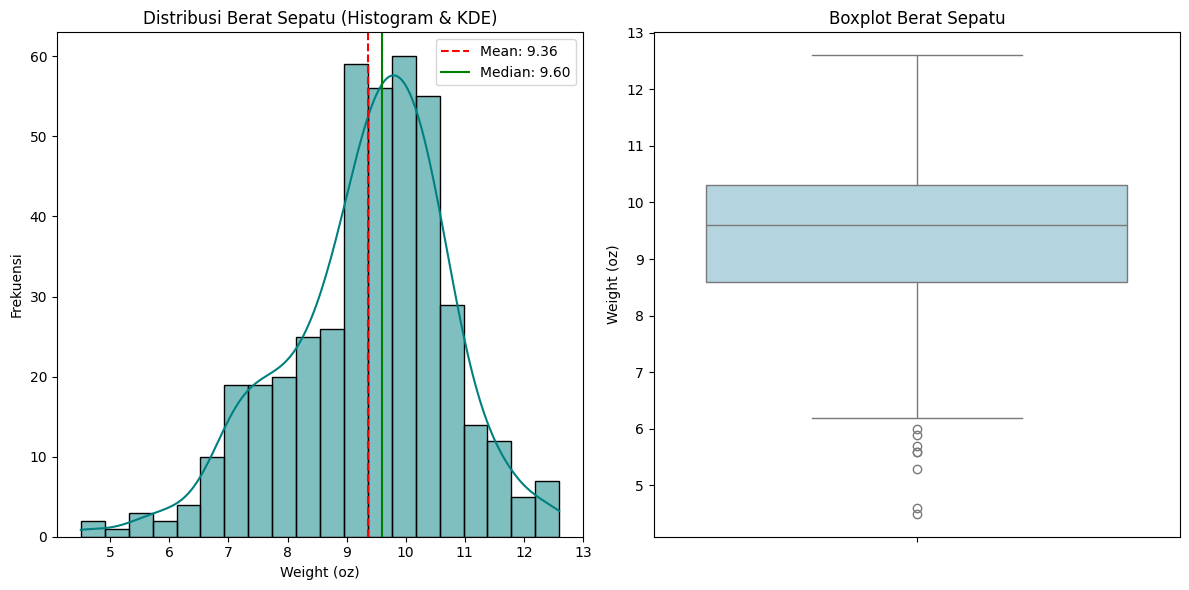

In [22]:
print(df['weight_lab_oz'].describe())

# Distribution Visualization
plt.figure(figsize=(12, 6))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['weight_lab_oz'], kde=True, color='teal', bins=20)
plt.axvline(df['weight_lab_oz'].mean(), color='red', linestyle='--', label=f"Mean: {df['weight_lab_oz'].mean():.2f}")
plt.axvline(df['weight_lab_oz'].median(), color='green', linestyle='-', label=f"Median: {df['weight_lab_oz'].median():.2f}")
plt.title('Distribusi Berat Sepatu (Histogram & KDE)')
plt.xlabel('Weight (oz)')
plt.ylabel('Frekuensi')
plt.legend()

# Subplot 2: Boxplot 
plt.subplot(1, 2, 2)
sns.boxplot(y=df['weight_lab_oz'], color='lightblue')
plt.title('Boxplot Berat Sepatu')
plt.ylabel('Weight (oz)')

plt.tight_layout()
plt.show()

Nantinya, weight akan menjadi filter yang disesuaikan oleh keinginan user. Misalnya, setelah hasil top 10 rekomendasi sepatu sudah keluar, user bisa sort sepatu tersebut berdasarkan rekomendasi dari 1-10 atau dari sepatu terberat/teringan (dengan tetap memedulikan similarity recommendation)

## Lightweight

In [23]:
print(df['lightweight'].value_counts())

lightweight
0    301
1    127
Name: count, dtype: int64


In [24]:
# Comparative Statistics Based on 'lightweight' Category
weight_stats = df.groupby('lightweight')['weight_lab_oz'].agg(['min', 'max', 'mean'])

print("Perbandingan Statistik Berat (weight_lab_oz):")
print(weight_stats)

Perbandingan Statistik Berat (weight_lab_oz):
             min   max       mean
lightweight                      
0            8.9  12.6  10.070764
1            4.5   8.8   7.672441


Dari sini didapatkan informasi bahwa RunRepeat mengkategorikan sepatu dengan berat <=8.8oz ke dalam jenis sepatu yang ringan (lightweight = 1) dan sisanya termasuk ke sepatu berkategori agak berat.

In [25]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   pace                         428 non-null    str    
 3   arch support                 428 non-null    str    
 4   weight lab weight brand      428 non-null    str    
 5   lightweight                  428 non-null    int64  
 6   drop lab drop brand          428 non-null    str    
 7   strike pattern               428 non-null    str    
 8   size                         428 non-null    str    
 9   midsole softness             428 non-null    str    
 10  toebox durability            428 non-null    str    
 11  heel padding durability      428 non-null    str    
 12  outsole durability           428 non-null    str    
 13  breathability                428 non

## Drop Heel Forefoot

In [26]:
print("Heel Lab Heel Brand Statistics:")
print(df['heel lab heel brand'].describe())
print(df['heel lab heel brand'].head())

print("\nForefoot Lab Forefoot Brand Statistics:")
print(df['forefoot lab forefoot brand'].describe())
print(df['forefoot lab forefoot brand'].head())

print("\nDrop Lab Drop Brand Statistics:")
print(df['drop lab drop brand'].describe())
print(df['drop lab drop brand'].head())

Heel Lab Heel Brand Statistics:
count                 428
unique                380
top       39.9 mm 40.0 mm
freq                    4
Name: heel lab heel brand, dtype: object
0    32.4 mm 36.0 mm
1    34.3 mm 32.5 mm
2    33.3 mm 32.5 mm
3    31.8 mm 32.0 mm
4    32.6 mm 34.0 mm
Name: heel lab heel brand, dtype: str

Forefoot Lab Forefoot Brand Statistics:
count                 428
unique                377
top       22.7 mm 24.0 mm
freq                    3
Name: forefoot lab forefoot brand, dtype: object
0    23.0 mm 26.0 mm
1    26.6 mm 24.5 mm
2    24.4 mm 22.5 mm
3    21.2 mm 21.0 mm
4    22.7 mm 24.0 mm
Name: forefoot lab forefoot brand, dtype: str

Drop Lab Drop Brand Statistics:
count               428
unique              266
top       9.6 mm 8.0 mm
freq                  7
Name: drop lab drop brand, dtype: object
0     9.4 mm 10.0 mm
1      7.7 mm 8.0 mm
2     8.9 mm 10.0 mm
3    10.6 mm 11.0 mm
4     9.9 mm 10.0 mm
Name: drop lab drop brand, dtype: str


For convention we will use lab measured value

In [27]:
cols = ['heel lab heel brand', 'forefoot lab forefoot brand', 'drop lab drop brand']

for col in cols:
    new_col_name = col.split(' ')[0] + '_lab_mm' 
    df[new_col_name] = (df[col].str.split(' ')
                        .str[0]
                        .str.replace('mm', '', case=False)
                        .replace('-', None)
                        .astype(float))

# Verify
new_cols = [c.split(' ')[0] + '_lab_mm' for c in cols]
print(df[cols + new_cols].head())

  heel lab heel brand forefoot lab forefoot brand drop lab drop brand  \
0     32.4 mm 36.0 mm             23.0 mm 26.0 mm      9.4 mm 10.0 mm   
1     34.3 mm 32.5 mm             26.6 mm 24.5 mm       7.7 mm 8.0 mm   
2     33.3 mm 32.5 mm             24.4 mm 22.5 mm      8.9 mm 10.0 mm   
3     31.8 mm 32.0 mm             21.2 mm 21.0 mm     10.6 mm 11.0 mm   
4     32.6 mm 34.0 mm             22.7 mm 24.0 mm      9.9 mm 10.0 mm   

   heel_lab_mm  forefoot_lab_mm  drop_lab_mm  
0         32.4             23.0          9.4  
1         34.3             26.6          7.7  
2         33.3             24.4          8.9  
3         31.8             21.2         10.6  
4         32.6             22.7          9.9  


In [28]:
# Selisih drop
df['drop_meas_mm'] = df['heel_lab_mm'] - df['forefoot_lab_mm']
df['drop_diff'] = df['drop_lab_mm'] - (df['heel_lab_mm'] - df['forefoot_lab_mm'])
print(df[['heel_lab_mm','forefoot_lab_mm', 'drop_lab_mm', 'drop_meas_mm', 'drop_diff']].head())


for index, row in df.iterrows():
    if row['drop_diff'] > 0.9:
        print(f"Index: {index} | Shoe: {row['name']}")
        print(f"  - Heel/Forefoot: {row['heel_lab_mm']}/{row['forefoot_lab_mm']} (Calc: {row['drop_meas_mm']:.1f}mm)")
        print(f"  - Drop Lab:      {row['drop_lab_mm']}mm")
        print(f"  - Diff:          {row['drop_diff']:.2f}mm")
        print("-" * 40)

# print max drop_diff
print()
print(df['drop_diff'].max())

   heel_lab_mm  forefoot_lab_mm  drop_lab_mm  drop_meas_mm     drop_diff
0         32.4             23.0          9.4           9.4  1.776357e-15
1         34.3             26.6          7.7           7.7  4.440892e-15
2         33.3             24.4          8.9           8.9  1.776357e-15
3         31.8             21.2         10.6          10.6 -1.776357e-15
4         32.6             22.7          9.9           9.9 -1.776357e-15

5.329070518200751e-15


Perbedaan antara measured drop dengan drop_lab biasanya disebabkan oleh drop yang diukur oleh lab menyertakan ketebalan insole, sementara perhitungan manual mungkin tidak konsisten atau perbedaan pada midsole yang ada. Dikarenakan perbedaan yang tidak terlalu jauh, maka ke depannya akan digunakan drop_lab_mm saja.

In [29]:
df.drop(columns=['drop_diff', 'drop_meas_mm'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   pace                         428 non-null    str    
 3   arch support                 428 non-null    str    
 4   weight lab weight brand      428 non-null    str    
 5   lightweight                  428 non-null    int64  
 6   drop lab drop brand          428 non-null    str    
 7   strike pattern               428 non-null    str    
 8   size                         428 non-null    str    
 9   midsole softness             428 non-null    str    
 10  toebox durability            428 non-null    str    
 11  heel padding durability      428 non-null    str    
 12  outsole durability           428 non-null    str    
 13  breathability                428 non

Statistik Deskriptif Geometri Midsole:
       heel_lab_mm  forefoot_lab_mm  drop_lab_mm
count   428.000000       428.000000   428.000000
mean     34.672196        26.082477     8.589486
std       5.139009         4.691054     2.959573
min       7.600000         7.600000    -0.800000
25%      31.800000        23.075000     7.100000
50%      34.600000        25.850000     8.900000
75%      38.100000        29.200000    10.425000
max      50.100000        41.300000    16.100000


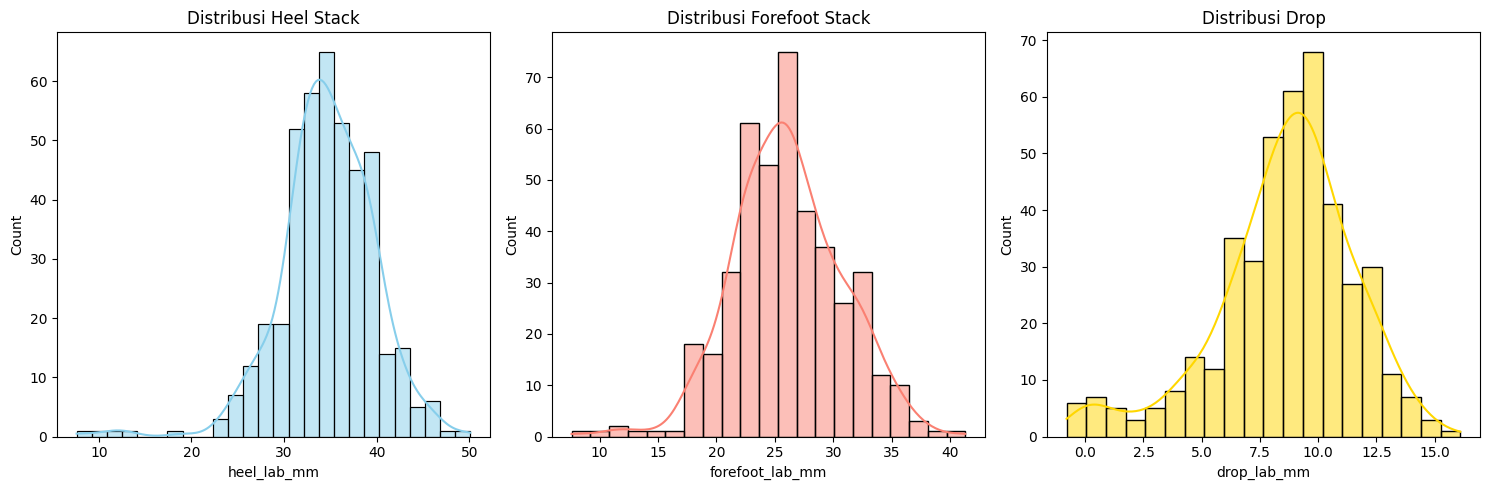

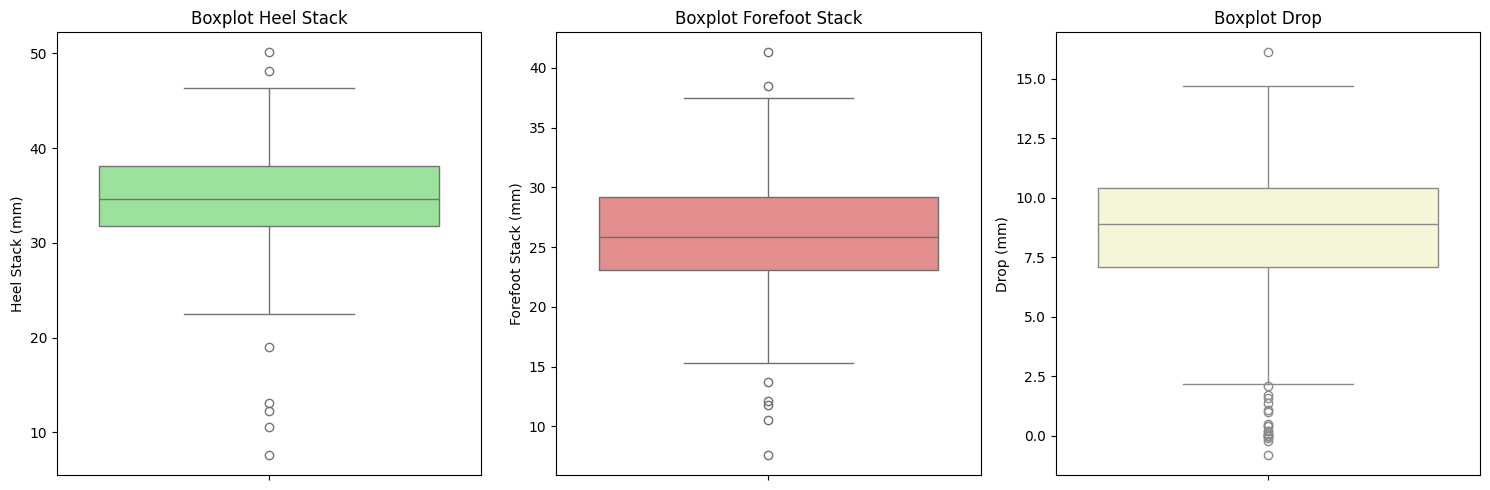

In [30]:
# Checking heel forefoot drop statistics and distributions
stats = df[['heel_lab_mm', 'forefoot_lab_mm', 'drop_lab_mm']].describe(percentiles=[.25, .5, .75])
print("Statistik Deskriptif Geometri Midsole:")
print(stats)

# Cheking distributions
plt.figure(figsize=(15, 5))

# Plot Heel
plt.subplot(1, 3, 1)
sns.histplot(df['heel_lab_mm'], kde=True, color='skyblue')
plt.title('Distribusi Heel Stack')

# Plot Forefoot
plt.subplot(1, 3, 2)
sns.histplot(df['forefoot_lab_mm'], kde=True, color='salmon')
plt.title('Distribusi Forefoot Stack')

# Plot Drop
plt.subplot(1, 3, 3)
sns.histplot(df['drop_lab_mm'], kde=True, color='gold')
plt.title('Distribusi Drop')

plt.tight_layout()
plt.show()

# Checking outliers
plt.figure(figsize=(15, 5))

# Plot Heel Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=df['heel_lab_mm'], color='lightgreen')
plt.title('Boxplot Heel Stack')
plt.ylabel('Heel Stack (mm)')

# Plot Forefoot Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['forefoot_lab_mm'], color='lightcoral')
plt.title('Boxplot Forefoot Stack')
plt.ylabel('Forefoot Stack (mm)')

# Plot Drop Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['drop_lab_mm'], color='lightgoldenrodyellow')
plt.title('Boxplot Drop')
plt.ylabel('Drop (mm)')

plt.tight_layout()
plt.show()

terdapat beberapa outliers tapi untuk saat ini kita ignore dulu, mungkin nanti di preprocessing bakal ngelakuin scaling tapi untuk saat ini kita ubah ke kategorikal based on data yg ada aja.

In [31]:
# Binning into categories based on tertiles
cols_to_bin = ['heel_lab_mm', 'forefoot_lab_mm', 'drop_lab_mm']

for col in cols_to_bin:
    q1 = df[col].quantile(0.33)
    q2 = df[col].quantile(0.66)
    
    new_cat_col = col.replace('_lab_mm', '_category')
    df[new_cat_col] = pd.qcut(df[col], q=3, labels=['low', 'medium', 'high'])

# Verify
print("Hasil Binning Kategori:")
print(df[['heel_category', 'forefoot_category', 'drop_category']].head())

# Checking ranges for each category
for col in ['heel_category', 'forefoot_category', 'drop_category']:
    print(f"\nRentang nilai untuk {col}:")
    print(df.groupby(col)[col.replace('_category', '_lab_mm')].agg(['min', 'max']))

Hasil Binning Kategori:
  heel_category forefoot_category drop_category
0           low               low        medium
1        medium            medium           low
2        medium            medium        medium
3           low               low          high
4           low               low          high

Rentang nilai untuk heel_category:
                min   max
heel_category            
low             7.6  32.9
medium         33.0  36.8
high           36.9  50.1

Rentang nilai untuk forefoot_category:
                    min   max
forefoot_category            
low                 7.6  24.1
medium             24.2  27.8
high               27.9  41.3

Rentang nilai untuk drop_category:
               min   max
drop_category           
low           -0.8   7.9
medium         8.0   9.8
high           9.9  16.1


In [32]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        428 non-null    str     
 1   name                         428 non-null    str     
 2   pace                         428 non-null    str     
 3   arch support                 428 non-null    str     
 4   weight lab weight brand      428 non-null    str     
 5   lightweight                  428 non-null    int64   
 6   drop lab drop brand          428 non-null    str     
 7   strike pattern               428 non-null    str     
 8   size                         428 non-null    str     
 9   midsole softness             428 non-null    str     
 10  toebox durability            428 non-null    str     
 11  heel padding durability      428 non-null    str     
 12  outsole durability           428 non-null    str     
 13  breathability        

## Strike pattern

In [33]:
print(df['strike pattern'].value_counts())

strike pattern
heelmid/forefoot     162
mid/forefoot         142
heel                 122
-                      1
heel mid/forefoot      1
Name: count, dtype: int64


Strike pattern merupakan fitur yang mendeskripsikan cara pelari untuk mendarat. Ada 3 jenis;
- heel : Pelari mendarat menggunakan tumit terlebih dahulu. Biasanya butuh sepatu dengan bantalan belakang yang tebal (heel_lab_mm) dan drop tinggi untuk mengurangi beban pada tendon Achilles.
- mid : Mendarat di bagian tengah kaki sehingga biasanya butuh drop yang stabil agar distribusi merata.
- forefoot : Pelari mendarat di bagian depan sehingga biasanya lebih suka sepatu dengan drop rendah (forefoot < heel) agar posisi kaki lebih natural.

In [34]:
df['strike_pattern'] = df['strike pattern'].str.replace(' ', '').str.replace('-', 'unknown')

# encode its base value
df['strike_heel'] = df['strike_pattern'].str.contains('heel').astype(int)
df['strike_mid'] = df['strike_pattern'].str.contains('mid').astype(int)
df['strike_fore'] = df['strike_pattern'].str.contains('forefoot').astype(int)

print(df[['strike pattern', 'strike_pattern', 'strike_heel', 'strike_mid', 'strike_fore']].head())

     strike pattern    strike_pattern  strike_heel  strike_mid  strike_fore
0  heelmid/forefoot  heelmid/forefoot            1           1            1
1      mid/forefoot      mid/forefoot            0           1            1
2  heelmid/forefoot  heelmid/forefoot            1           1            1
3              heel              heel            1           0            0
4  heelmid/forefoot  heelmid/forefoot            1           1            1


In [35]:
ct_forefoot = pd.crosstab(df['strike_fore'], df['forefoot_category'], normalize='index') * 100
ct_heel = pd.crosstab(df['strike_heel'], df['heel_category'], normalize='index') * 100

print("---  Strike vs Forefoot Category (%) ---")
print(ct_forefoot.round(2))
print("\n--- Strike vs Heel Category (%) ---")
print(ct_heel.round(2))

---  Strike vs Forefoot Category (%) ---
forefoot_category    low  medium   high
strike_fore                            
0                  43.09   39.84  17.07
1                  29.51   31.15  39.34

--- Strike vs Heel Category (%) ---
heel_category    low  medium   high
strike_heel                        
0              49.65   27.27  23.08
1              25.61   36.49  37.89


In [36]:
# Perbandingan rata-rata nilai asli 
strike_analysis = df.groupby('strike_pattern')[['forefoot_lab_mm', 'drop_lab_mm']].mean()

print("Rata-rata Nilai Asli Berdasarkan Strike Pattern:")
print(strike_analysis)

Rata-rata Nilai Asli Berdasarkan Strike Pattern:
                  forefoot_lab_mm  drop_lab_mm
strike_pattern                                
heel                    24.535246    11.726230
heelmid/forefoot        26.639877     8.988957
mid/forefoot            26.859155     5.423239
unknown                 13.700000    10.400000


Diketahui semenjak era super shoes, banyak brand yang lebih suka masukin busa (foam) ke are forefoot makanya banyak forefoot yang tinggi. Hal ini dilakukan dengan harapan agar pantulan  energinya (energy return) maksimal. Seperti contohnya, sepatu forefoot striker punya forefoot yang tebal dan drop rendah agar feel sepatunya tetap empuk.

C:\Users\caxyl\AppData\Local\Temp\ipykernel_32524\3679098273.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Heel Support', 'Midfoot Support', 'Forefoot Support'], y=base_counts, ax=axes[1, 1], palette='viridis')


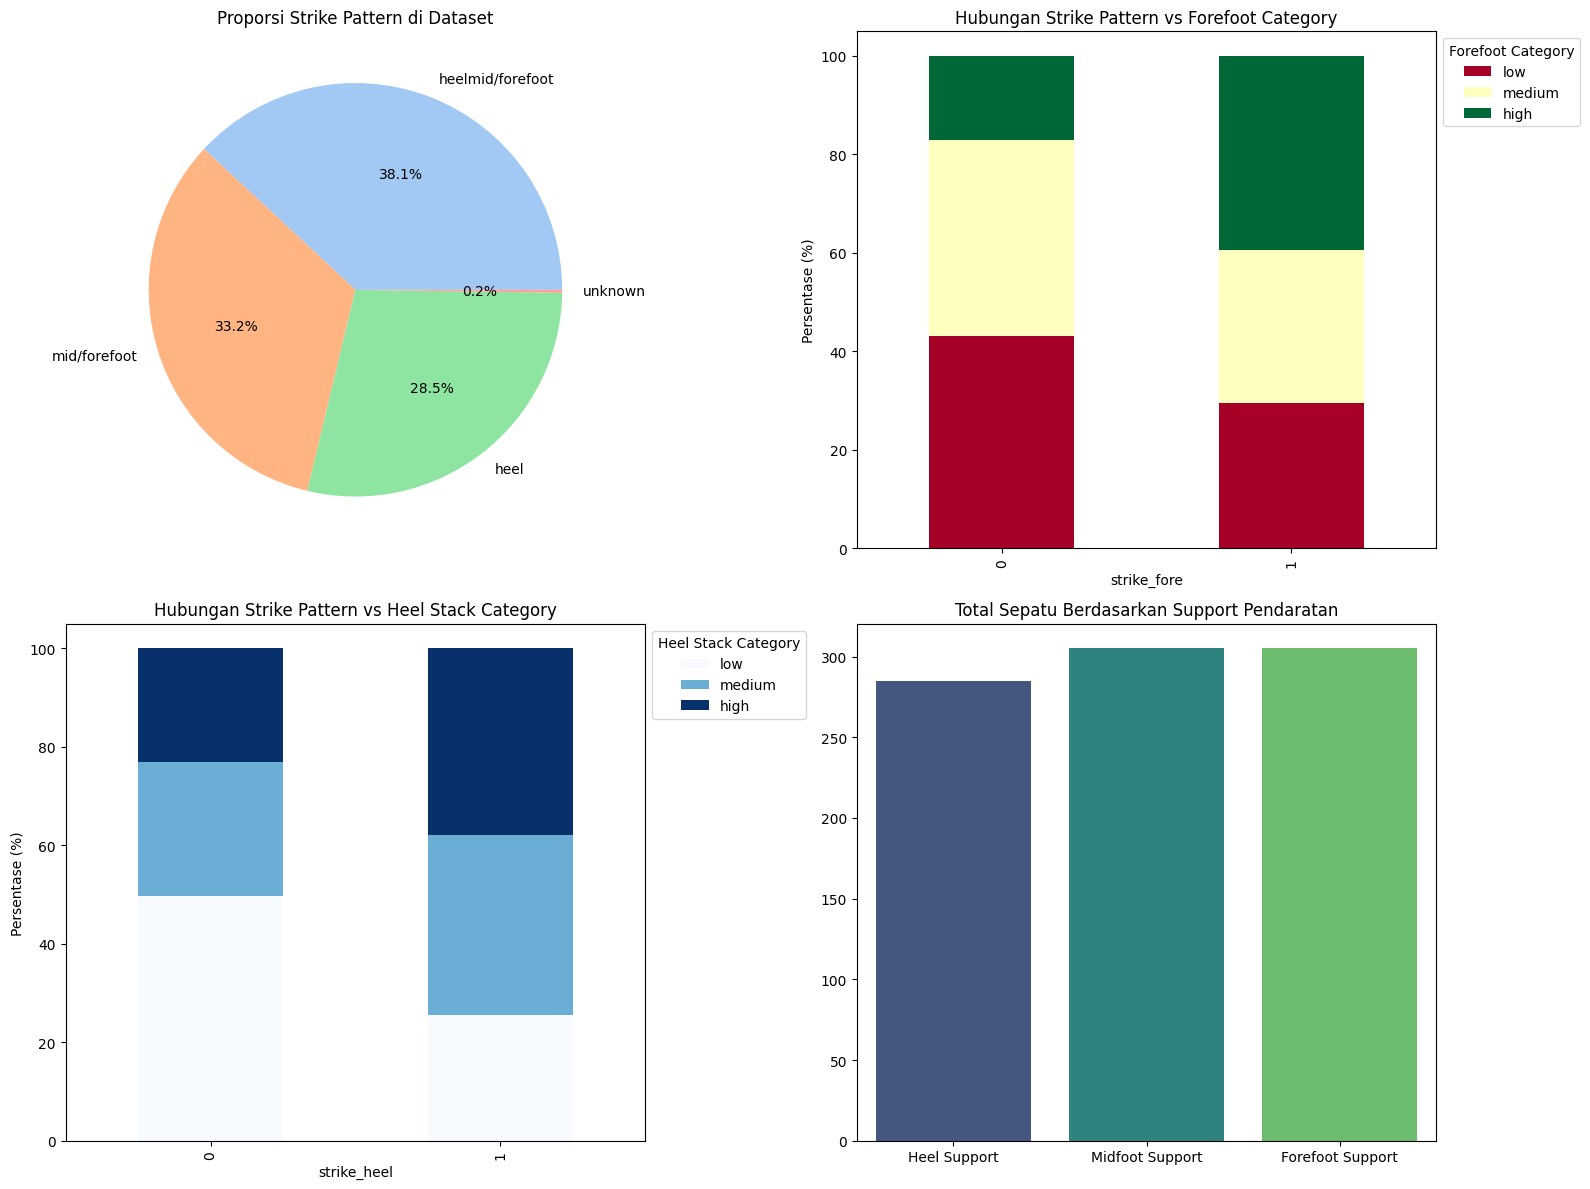

In [37]:
# Plotting Diagram
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# running style distribution
strike_counts = df['strike_pattern'].value_counts()
axes[0, 0].pie(strike_counts, labels=strike_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[0, 0].set_title('Proporsi Strike Pattern di Dataset')

# B. Stacked Bar - Strike vs Forefoot (Korelasi Penting)
ct_forefoot.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='RdYlGn')
axes[0, 1].set_title('Hubungan Strike Pattern vs Forefoot Category')
axes[0, 1].set_ylabel('Persentase (%)')
axes[0, 1].legend(title='Forefoot Category', bbox_to_anchor=(1, 1))

# C. Stacked Bar - Strike vs Heel Stack
ct_heel.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='Blues')
axes[1, 0].set_title('Hubungan Strike Pattern vs Heel Stack Category')
axes[1, 0].set_ylabel('Persentase (%)')
axes[1, 0].legend(title='Heel Stack Category', bbox_to_anchor=(1, 1))

# D. Bar Chart - Base Value Count
base_counts = [df['strike_heel'].sum(), df['strike_mid'].sum(), df['strike_fore'].sum()]
sns.barplot(x=['Heel Support', 'Midfoot Support', 'Forefoot Support'], y=base_counts, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Total Sepatu Berdasarkan Support Pendaratan')

plt.tight_layout()
plt.show()

Untuk menjangkau fitur ini secara eksplisit diperlukan user input mengenai strike pattern mereka, tetapi untuk pelari awam biasanya tidak mengerti mengenai hal tersebut. Maka dari itu, akan dibuat optional input untuk advanced user (pelari senior) yang berisikan opsi-opsi untuk strike pattern mereka. 

Skenario 1 - user tidak mengisi input strike pattern : 
- masuk ke default strike pattern yang aman untuk semua pelari yaitu sepatu heel/mid/forefoot
- pilih kategori drop medium
- menggunakan heel dan forefoot medium

Skenario 2 - user memilih salah satu strike pattern:
- heel striker membutuhkan proteksi lebih pada tumit mereka sehingga mappingnya akan menjadi Drop: high, Heel : high, Forefoot : low
- midfoot striker membutuhkan transisi yang lancar dan bantalan di tengah ke depan sehingga kita pilih Drop: medium, Heel : medium, Forefoot: high
- Forefoot striker membutuhkan posisi natural kaki dengan energy return yang maksimal sehingga mappingnya akan menjadi Drop: low, Heel : medium, Forefoot: high

In [38]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        428 non-null    str     
 1   name                         428 non-null    str     
 2   pace                         428 non-null    str     
 3   arch support                 428 non-null    str     
 4   weight lab weight brand      428 non-null    str     
 5   lightweight                  428 non-null    int64   
 6   drop lab drop brand          428 non-null    str     
 7   strike pattern               428 non-null    str     
 8   size                         428 non-null    str     
 9   midsole softness             428 non-null    str     
 10  toebox durability            428 non-null    str     
 11  heel padding durability      428 non-null    str     
 12  outsole durability           428 non-null    str     
 13  breathability        

## Size, width / fit, width available, toebox width

In [39]:
print(df[['size', 'width / fit', 'widths available', 'toebox width']].head())

             size width / fit widths available toebox width
0    true to size      narrow       normalwide            -
1    true to size      narrow           normal       medium
2    true to size      narrow           normal            -
3  slightly small      narrow           normal            -
4    true to size      narrow           normal       medium


Size diambil dari voting user RunRepeat dan widths available merupakan pilihan yang ditawarkan oleh brand sesuai availability di tokonya. Ini merupakan informasi yang tidak berdasar sehingga untuk ke depannya akan digunakan feature width / fit sebagai acuan ukuran sepatu saat dipakai pada ukuran standar (D untuk pria dan B untuk wanita).

In [40]:
df.drop(columns=['size','widths available'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        428 non-null    str     
 1   name                         428 non-null    str     
 2   pace                         428 non-null    str     
 3   arch support                 428 non-null    str     
 4   weight lab weight brand      428 non-null    str     
 5   lightweight                  428 non-null    int64   
 6   drop lab drop brand          428 non-null    str     
 7   strike pattern               428 non-null    str     
 8   midsole softness             428 non-null    str     
 9   toebox durability            428 non-null    str     
 10  heel padding durability      428 non-null    str     
 11  outsole durability           428 non-null    str     
 12  breathability                428 non-null    str     
 13  width / fit          

In [41]:
print(df['width / fit'].value_counts())

width / fit
medium    256
narrow    140
wide       32
Name: count, dtype: int64


Terdapat 3 kategori sepatu:
- medium : standar sepatu yang diciptakan untuk mayoritas daily runner
- narrow : sepatu yang terasa agak sempit
- wide : sepatu untuk kaki yang lebar

Feature ini membutuhkan input user langsung yang berisikan jenis ukuran kaki mereka.

In [42]:
# Crossing table width / fit vs toebox width
ct_width_toebox = pd.crosstab(df['width / fit'], df['toebox width'], normalize='index') * 100
print("Crossing Table Width / Fit vs Toebox Width (%):")
print(ct_width_toebox.round(5))

Crossing Table Width / Fit vs Toebox Width (%):
toebox width         -    medium    narrow      wide
width / fit                                         
medium        17.96875  57.81250  10.15625  14.06250
narrow        42.14286  32.85714  20.71429   4.28571
wide           9.37500  31.25000   0.00000  59.37500


Rendahnya korelasi antara width / fit dan toebox width menandakan bahwa width / fit tidak bisa ditentukan oleh toebox-nya saja melainkan dari overall kesuluruhan sepatu. 

## Midsole softness

In [43]:
print(df['midsole softness'].value_counts())

midsole softness
soft        177
balanced    172
-            61
firm         18
Name: count, dtype: int64


In [44]:
ms_analysis = df.groupby('midsole softness')['heel_lab_mm'].agg(['min', 'mean', 'max'])
ms_analysis = ms_analysis.sort_values('mean', ascending=False)

print("Heel Stack (mm) vs Midsole Softness Analysis:")
print(ms_analysis)

Heel Stack (mm) vs Midsole Softness Analysis:
                   min       mean   max
midsole softness                       
soft              24.6  36.490960  50.1
balanced          22.5  34.153488  45.7
-                  7.6  32.019672  42.3
firm              13.1  30.733333  38.5


Sepatu dengan midsole berkategori soft memiliki minimum heel tertinggi di antara kategori lainnya, akan tetapi terdapat sepatu berkategori firm yang mempunyai heel setara sepatu berkategori soft. Hal ini menunjukan bahwa beberapa sepatu yang memiliki heel tinggi tidak selalu berartikan bahwa sepatu itu empuk (mempunyai midsole yang soft).

In [45]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        428 non-null    str     
 1   name                         428 non-null    str     
 2   pace                         428 non-null    str     
 3   arch support                 428 non-null    str     
 4   weight lab weight brand      428 non-null    str     
 5   lightweight                  428 non-null    int64   
 6   drop lab drop brand          428 non-null    str     
 7   strike pattern               428 non-null    str     
 8   midsole softness             428 non-null    str     
 9   toebox durability            428 non-null    str     
 10  heel padding durability      428 non-null    str     
 11  outsole durability           428 non-null    str     
 12  breathability                428 non-null    str     
 13  width / fit          

## Toebox, Heel padding, Outsole Durability

In [46]:
print(df[['toebox durability', 'heel padding durability', 'outsole durability']].head())

print("\nToebox Durability Value Counts:")
print(df['toebox durability'].value_counts())

print("\nHeel Padding Durability Value Counts:")
print(df['heel padding durability'].value_counts())

print("\nOutsole Durability Value Counts:")
print(df['outsole durability'].value_counts())

  toebox durability heel padding durability outsole durability
0                 -                       -                  -
1              good                    good               good
2                 -                    good                  -
3                 -                       -                  -
4              good                    good               good

Toebox Durability Value Counts:
toebox durability
decent    150
-         117
bad        88
good       73
Name: count, dtype: int64

Heel Padding Durability Value Counts:
heel padding durability
good      179
-         122
decent     77
bad        50
Name: count, dtype: int64

Outsole Durability Value Counts:
outsole durability
good      206
-         134
decent     67
bad        21
Name: count, dtype: int64


- Toebox durability merupakan ketahanan bagian atas (mesh) di area jari kaki terhadap gesekan atau robekan. Ini penting buat pelari yang jempolnya suka "nembus" ke atas atau sering lari di medan yang banyak kerikil, sehingga diperlukan korelasi antara feature ini dan rocker serta plate sepatunya.

- Heel padding durability menandakan seberapa kuat kain dan busa di bagian tumit belakang. Perlu dilihat korelasi antara feature ini dengan heel striker.

- Outsole durability adalah ketahanan karet bagian bawah terhadap pengikisan aspal. Ini yang menentukan seberapa cepat terjadinya kebotakan pada grip sepat.

c:\Users\caxyl\OneDrive\Documents\a_project\sonix-ml\env\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\caxyl\OneDrive\Documents\a_project\sonix-ml\env\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


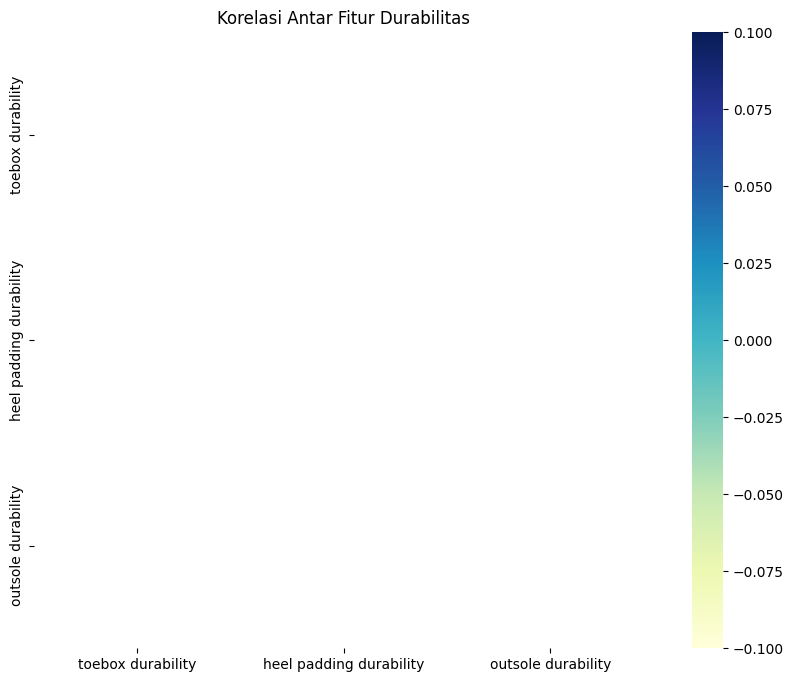

Rata-rata Skor Durabilitas:
toebox durability         NaN
heel padding durability   NaN
outsole durability        NaN
dtype: float64


In [47]:
# Correlation between toebox durability, heel padding durability, and outsole durability
durability_cols = ['toebox durability', 'heel padding durability', 'outsole durability']
df_durability = df[durability_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = df_durability.corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Fitur Durabilitas')
plt.show()

print("Rata-rata Skor Durabilitas:")
print(df_durability.mean().sort_values())

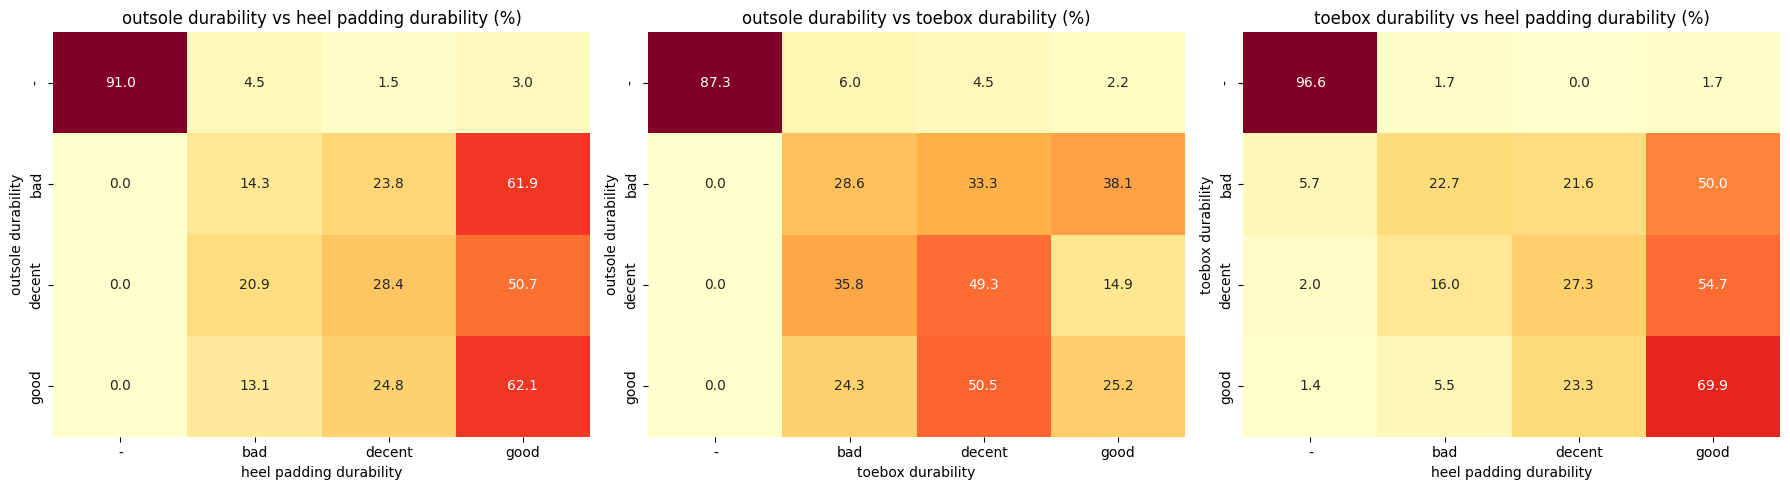

Detail Crosstab: Outsole vs Heel Padding (Normalized by Outsole)
heel padding durability     -   bad  decent  good
outsole durability                               
-                        91.0   4.0     1.0   3.0
bad                       0.0  14.0    24.0  62.0
decent                    0.0  21.0    28.0  51.0
good                      0.0  13.0    25.0  62.0

Detail Crosstab: Outsole vs Toebox (Normalized by Outsole)
toebox durability      -   bad  decent  good
outsole durability                          
-                   87.0   6.0     4.0   2.0
bad                  0.0  29.0    33.0  38.0
decent               0.0  36.0    49.0  15.0
good                 0.0  24.0    50.0  25.0

Detail Crosstab: Toebox vs Heel Padding (Normalized by Toebox)
heel padding durability     -   bad  decent  good
toebox durability                                
-                        97.0   2.0     0.0   2.0
bad                       6.0  23.0    22.0  50.0
decent                    2.0  16.0    27

In [48]:
# Crossing tables between durability features
pairs = [
    ('outsole durability', 'heel padding durability'),
    ('outsole durability', 'toebox durability'),
    ('toebox durability', 'heel padding durability')
]

plt.figure(figsize=(18, 5))

for i, (feat_x, feat_y) in enumerate(pairs):
    ct = pd.crosstab(df[feat_x], df[feat_y], normalize='index') * 100
    
    # Plotting Heatmap
    plt.subplot(1, 3, i+1)
    sns.heatmap(ct, annot=True, fmt=".1f", cmap="YlOrRd", cbar=False)
    plt.title(f'{feat_x} vs {feat_y} (%)')
    plt.xlabel(feat_y)
    plt.ylabel(feat_x)

plt.tight_layout()
plt.show()

# Outsole vs Heel Padding Durability Crosstab
print("Detail Crosstab: Outsole vs Heel Padding (Normalized by Outsole)")
print(pd.crosstab(df['outsole durability'], df['heel padding durability'], normalize='index').round(2) * 100)

# Outsole vs Toebox Durability Crosstab
print("\nDetail Crosstab: Outsole vs Toebox (Normalized by Outsole)")
print(pd.crosstab(df['outsole durability'], df['toebox durability'], normalize='index').round(2) * 100)

# Toebox vs Heel Padding Durability Crosstab
print("\nDetail Crosstab: Toebox vs Heel Padding (Normalized by Toebox)")
print(pd.crosstab(df['toebox durability'], df['heel padding durability'], normalize='index').round(2) * 100)

- Pada analisis mengenai outsole dan heel padding, kebanyakan sepatu memiliki heel padding yang bagus walaupun outsole sepatunya dikategorikan buruk.

- Pada analisis mengenai outsole dan toebox, hanya terdapat 25% sepatu yang mempunyai outsole dan toebox berkategori baik, kebanyakannya hanya decent atau biasa saja. Bahkan, banyak sepatu yang memiliki sol kuat tetapi kain bagian depannya lebih cepat jebol.

- Pada analisis mengenai toebox dan heel padding, datanya banyak yang ksosong sehingga tidak bisa diinferensikan



Dikarenakan sedikitnya data yang menunjukan sepatu berkategori "good" di semua durability cols, diperlukan penyesuaian lebih lanjut mengenai hal ini.

In [49]:
# Checking heel padding durability with heel striker
ct_heel_strike = pd.crosstab(df['strike_heel'], df['heel padding durability'], normalize='index') * 100
print("--- Komposisi Heel Padding Durability: Heel Striker vs Others (%) ---")
print(ct_heel_strike.round(5))

print()

# Cheking heel padding durability with plate
ct_heel_plate = pd.crosstab(df['plate'], df['heel padding durability'], normalize='index') * 100
print("--- Komposisi Heel Padding Durability: Plate vs Others (%) ---")
print(ct_heel_plate.round(5))

--- Komposisi Heel Padding Durability: Heel Striker vs Others (%) ---
heel padding durability         -       bad    decent      good
strike_heel                                                    
0                        31.46853  10.48951  19.58042  38.46154
1                        27.01754  12.28070  17.19298  43.50877

--- Komposisi Heel Padding Durability: Plate vs Others (%) ---
heel padding durability          -       bad    decent      good
plate                                                           
0                         29.26829  13.00813  17.88618  39.83740
carbon plate              22.41379   3.44828  18.96552  55.17241
carbon platerock plate   100.00000   0.00000   0.00000   0.00000


Terdapat sekitar 43% sepatu yang memiliki heel padding berkategori "good" dengan kategori sepatu heel striker. Akan tetapi, semua sepatu yang memiliki carbon dan rocker plate kekurangan informasi terhadap heel padding durability. 

In [50]:
# Checking outsole durability with striker
ct_heel_strike = pd.crosstab(df['strike_heel'], df['outsole durability'], normalize='index') * 100
print("--- Komposisi Outsole Durability: Heel Striker vs Others (%) ---")
print(ct_heel_strike.round(5))

ct_heel_strike = pd.crosstab(df['strike_mid'], df['outsole durability'], normalize='index') * 100
print("--- Komposisi Outsole Durability: Midfoot Striker vs Others (%) ---")
print(ct_heel_strike.round(5))

ct_heel_strike = pd.crosstab(df['strike_fore'], df['outsole durability'], normalize='index') * 100
print("--- Komposisi Outsole Durability: Forefoot Striker vs Others (%) ---")
print(ct_heel_strike.round(5))

# Checking outsole durability with plate
ct_heel_plate = pd.crosstab(df['plate'], df['outsole durability'], normalize='index') * 100
print("--- Komposisi Outsole Durability: Plate vs Others (%) ---")
print(ct_heel_plate.round(5))

# Checking outsole durability with rocker
ct_heel_rocker = pd.crosstab(df['rocker'], df['outsole durability'], normalize='index') * 100
print("--- Komposisi Outsole Durability: Rocker vs Others (%) ---")
print(ct_heel_rocker.round(5))

--- Komposisi Outsole Durability: Heel Striker vs Others (%) ---
outsole durability         -      bad    decent      good
strike_heel                                              
0                   33.56643  3.49650  16.08392  46.85315
1                   30.17544  5.61404  15.43860  48.77193
--- Komposisi Outsole Durability: Midfoot Striker vs Others (%) ---
outsole durability         -      bad    decent      good
strike_mid                                               
0                   31.70732  5.69106  15.44715  47.15447
1                   31.14754  4.59016  15.73770  48.52459
--- Komposisi Outsole Durability: Forefoot Striker vs Others (%) ---
outsole durability         -      bad    decent      good
strike_fore                                              
0                   31.70732  5.69106  15.44715  47.15447
1                   31.14754  4.59016  15.73770  48.52459
--- Komposisi Outsole Durability: Plate vs Others (%) ---
outsole durability              -       bad 

Rata rata untuk semua striker baik itu heel, midfoot, dan forefoot striker memiliki outsole durability yang tergolong baik. Adapun dapat dilihat juga bahwa durabilitas pada outsole tidak terdefinisikan dengan teknologi untuk plate ataupun rocker yang digunakan.

Sepatu yang direkomendasikan nantinya tentunya akan disorting berdasarkan durability terbaik, tetapi akan ada trade off masing - masing, sepertinya misalnya jika user adalah heel striker maka akan dipilih heel padding durability terbaik, dsb.

In [51]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        428 non-null    str     
 1   name                         428 non-null    str     
 2   pace                         428 non-null    str     
 3   arch support                 428 non-null    str     
 4   weight lab weight brand      428 non-null    str     
 5   lightweight                  428 non-null    int64   
 6   drop lab drop brand          428 non-null    str     
 7   strike pattern               428 non-null    str     
 8   midsole softness             428 non-null    str     
 9   toebox durability            428 non-null    str     
 10  heel padding durability      428 non-null    str     
 11  outsole durability           428 non-null    str     
 12  breathability                428 non-null    str     
 13  width / fit          

## Breathability

In [52]:
print(df['breathability'].value_counts())

breathability
moderate      208
breathable    109
-              58
warm           53
Name: count, dtype: int64


RunRepeat claims bahwa sepatu untuk summer season adalah sepatu yang memiliki breathability tertinggi dan winter season shoes adalah sepatu yang memiliki breathability low/mid. Lalu, ada beberapa feature lain yang berinteraksi dengan feature ini seperti shoes durability dan weight.

--- Komposisi Breathability berdasarkan Musim (%) ---
season             -  all seasons  summerall seasons    winter
breathability                                                 
-              100.0      0.00000                0.0   0.00000
breathable       0.0      0.00000              100.0   0.00000
moderate         0.0    100.00000                0.0   0.00000
warm             0.0     77.35849                0.0  22.64151

--- Komposisi Breathability berdasarkan Toebox Durability (%) ---
toebox durability          -       bad    decent      good
breathability                                             
-                  100.00000   0.00000   0.00000   0.00000
breathable          18.34862  34.86239  31.19266  15.59633
moderate            13.94231  21.63462  46.63462  17.78846
warm                18.86792   9.43396  35.84906  35.84906

--- Komposisi Breathability berdasarkan Outsole Durability (%) ---
outsole durability          -      bad    decent      good
breathability       

C:\Users\caxyl\AppData\Local\Temp\ipykernel_32524\668151946.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='breathability', y='weight_lab_oz', data=df, palette='Set2')


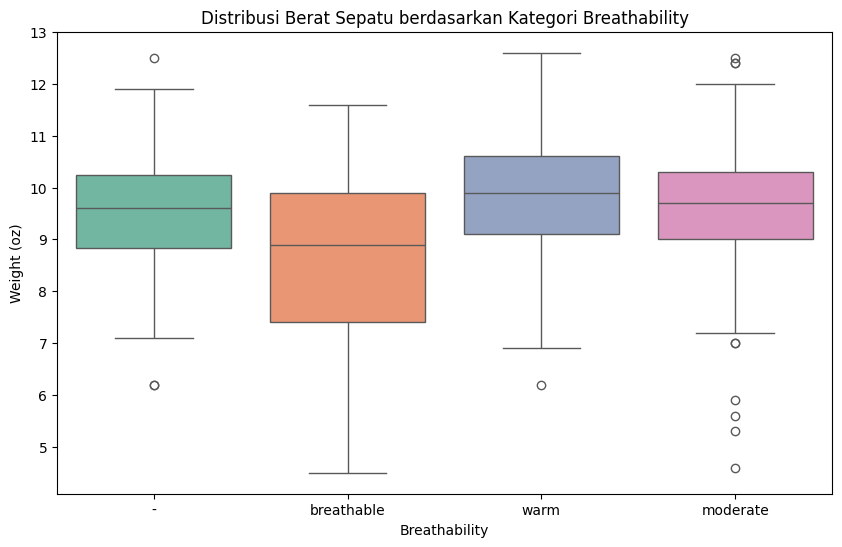

In [53]:
# Checking breathability correlation with seasons
ct_breathability_seasons = pd.crosstab(df['breathability'], df['season'], normalize='index') * 100
print("--- Komposisi Breathability berdasarkan Musim (%) ---")
print(ct_breathability_seasons.round(5))

# Checking breathability correlation with toebox durability
ct_breathability_toebox_dur = pd.crosstab(df['breathability'], df['toebox durability'], normalize='index') * 100
print("\n--- Komposisi Breathability berdasarkan Toebox Durability (%) ---")
print(ct_breathability_toebox_dur.round(5))

# Checking breathability correlation with outsole durability
ct_breathability_outsole_dur = pd.crosstab(df['breathability'], df['outsole durability'], normalize='index') * 100
print("\n--- Komposisi Breathability berdasarkan Outsole Durability (%) ---")
print(ct_breathability_outsole_dur.round(5))

# Cheking breathability distribution with weight_lab_oz
plt.figure(figsize=(10, 6))
sns.boxplot(x='breathability', y='weight_lab_oz', data=df, palette='Set2')
plt.title('Distribusi Berat Sepatu berdasarkan Kategori Breathability')
plt.xlabel('Breathability')
plt.ylabel('Weight (oz)')
plt.show()



Bisa dilihat bahwa:
- Seluruh sepatu dengan kategori breathability breathable adalah sepatu untuk summer all season. Lalu, seluruh sepatu dengan kategori breathability moderate adalah sepatu untuk all season atau daily basics. Sedangkan, sepatu dengan kategori warm adalah sepatu yang cocok untuk winter dan juga all seasons.
- Antara breathability dan durabilitas, tidak ada korelasi signifikan kecuali 58% sepatu berkategori warm yang memiliki good outsole durability.
- Sepatu yang breatahble cenderung memiliki weight yang lebih ringan dibanding sepatu lainnya dan sepatu berkategori warm cenderung menjadi yang terberat di antara kategori lainnya.


Untuk requirement dasar saat ini, dikarenakan main market target kita adalah orang orang Indonesia maka dari itu secara default akan dipasangkan untuk sepatu dengan breathability breathable-moderate.

In [54]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        428 non-null    str     
 1   name                         428 non-null    str     
 2   pace                         428 non-null    str     
 3   arch support                 428 non-null    str     
 4   weight lab weight brand      428 non-null    str     
 5   lightweight                  428 non-null    int64   
 6   drop lab drop brand          428 non-null    str     
 7   strike pattern               428 non-null    str     
 8   midsole softness             428 non-null    str     
 9   toebox durability            428 non-null    str     
 10  heel padding durability      428 non-null    str     
 11  outsole durability           428 non-null    str     
 12  breathability                428 non-null    str     
 13  width / fit          

## Stiffness, torsional rigidity, and heel counter stiffness

In [55]:
print(df[['stiffness', 'torsional rigidity', 'heel counter stiffness']].head())
print()
print(df['stiffness'].value_counts())
print()
print(df['torsional rigidity'].value_counts())
print()
print(df['heel counter stiffness'].value_counts())

  stiffness torsional rigidity heel counter stiffness
0     stiff              stiff               flexible
1     stiff           moderate               moderate
2     stiff           flexible               flexible
3     stiff           flexible               moderate
4  moderate           flexible               flexible

stiffness
stiff       217
moderate    163
flexible     35
-            13
Name: count, dtype: int64

torsional rigidity
stiff       213
moderate    123
flexible     74
-            18
Name: count, dtype: int64

heel counter stiffness
moderate    146
flexible    132
stiff       121
-            29
Name: count, dtype: int64


- Stiffness menandakan kesulitan untuk menekuk sepatu dari bagian depan hingga belakang. Sepatu dengan plate tambahan atau busa yang sangat tebal akan membuat sepatunya masuk ke kategori stiff.
- Torsional rigidity menandakan sebara sulit sepatu tersebut dipuntir atau diputar. Torsional rigidity yang stiff menjaga kaki tetap sejajar (lurus) dan biasanya digunakan oleh orang yang memiliki kaki overpronasi.
- Heel counter stiffness menandakan seberapa kaku mangkuk pelindung tumit di bagian belakang. Di sini, kategori stiff mengunci tumit agar tidak goyang ke kanan atau ke kiri.

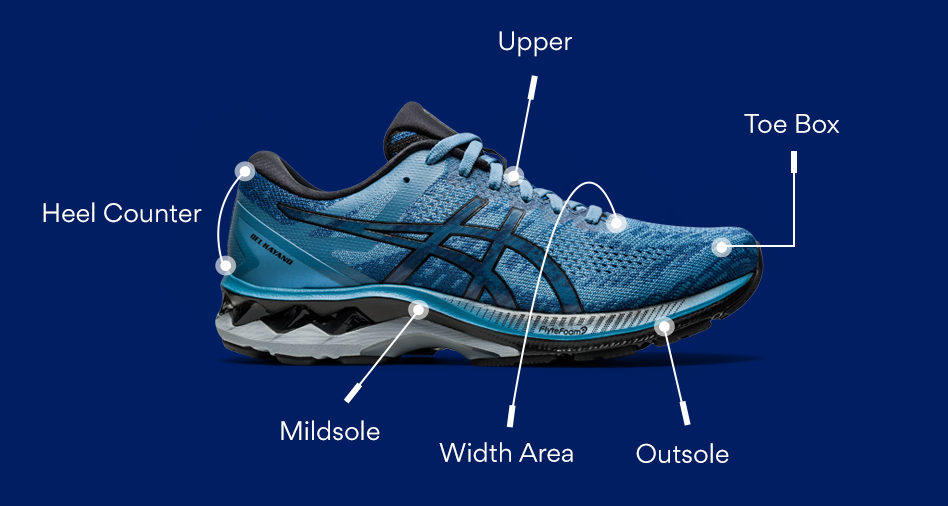

Untuk menjangkau feature ini, ditambahkan satu optional input stability need yang berisikan pilihan antara neutral atau guided. Sepatu guided adalah sepatu yang memiliki stiffness stiff sedangkan neutral lebih cocok untuk moderate shoes.

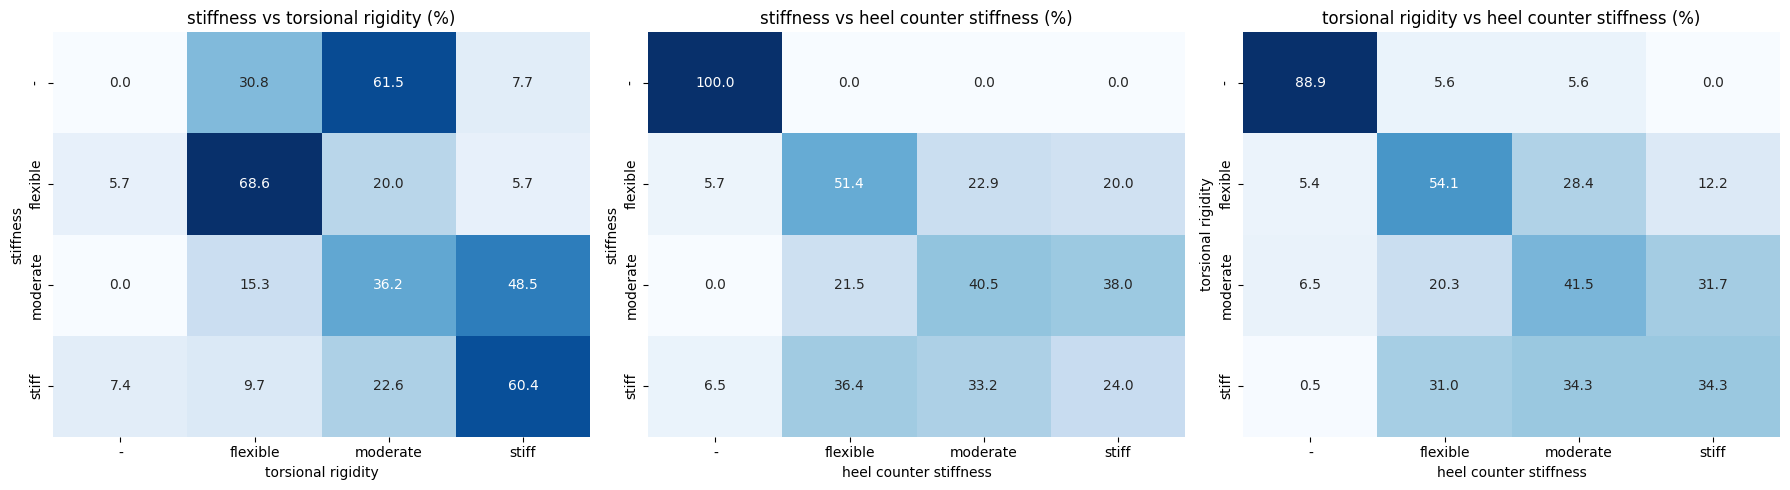

In [56]:
stiff = [
    ('stiffness', 'torsional rigidity'),
    ('stiffness', 'heel counter stiffness'),
    ('torsional rigidity', 'heel counter stiffness')
]

plt.figure(figsize=(18, 5))

for i, (feat_x, feat_y) in enumerate(stiff):
    ct = pd.crosstab(df[feat_x], df[feat_y], normalize='index') * 100
    plt.subplot(1, 3, i+1)
    sns.heatmap(ct, annot=True, fmt=".1f", cmap="Blues", cbar=False)
    plt.title(f'{feat_x} vs {feat_y} (%)')

plt.tight_layout()
plt.show()

In [57]:
# Correlation details between stiffness and plates
ct_stiff_plate = pd.crosstab(df['stiffness'], df['plate'], normalize='index') * 100
print("Correlation between Stiffness and Plate (%):")
print(ct_stiff_plate.round(5))

# Correlation details between stiffness and midsole softness
ct_stiff_midsole = pd.crosstab(df['stiffness'], df['midsole softness'], normalize='index') * 100
print("\nCorrelation between Stiffness and Midsole Softness (%):")
print(ct_stiff_midsole.round(5))

Correlation between Stiffness and Plate (%):
plate             0  carbon plate  carbon platerock plate
stiffness                                                
-          92.30769       7.69231                 0.00000
flexible   97.14286       2.85714                 0.00000
moderate   96.93252       3.06748                 0.00000
stiff      76.03687      23.50230                 0.46083

Correlation between Stiffness and Midsole Softness (%):
midsole softness          -  balanced     firm      soft
stiffness                                               
-                 100.00000   0.00000  0.00000   0.00000
flexible           17.14286  42.85714  5.71429  34.28571
moderate            0.61350  44.17178  3.68098  51.53374
stiff              18.89401  39.17051  4.60829  37.32719


Tidak ada korelasi signifikan antara stiffness dan plate ataupun midsole softness, kecuali pada 51% sepatu stiffness berkategori moderate yang memiliki midsole soft.

In [58]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        428 non-null    str     
 1   name                         428 non-null    str     
 2   pace                         428 non-null    str     
 3   arch support                 428 non-null    str     
 4   weight lab weight brand      428 non-null    str     
 5   lightweight                  428 non-null    int64   
 6   drop lab drop brand          428 non-null    str     
 7   strike pattern               428 non-null    str     
 8   midsole softness             428 non-null    str     
 9   toebox durability            428 non-null    str     
 10  heel padding durability      428 non-null    str     
 11  outsole durability           428 non-null    str     
 12  breathability                428 non-null    str     
 13  width / fit          

## Plate and rocker

In [59]:
print(df['plate'].value_counts())
print()
print(df['rocker'].value_counts())

print("\ncorrelation between plate and rocker")
ct_plate_rocker = pd.crosstab(df['plate'], df['rocker'], normalize='index') * 100
print(ct_plate_rocker.round(5))

plate
0                         369
carbon plate               58
carbon platerock plate      1
Name: count, dtype: int64

rocker
0    286
1    142
Name: count, dtype: int64

correlation between plate and rocker
rocker                         0          1
plate                                      
0                       75.33875   24.66125
carbon plate            13.79310   86.20690
carbon platerock plate   0.00000  100.00000


Kebanyakan sepatu pada dataset adalah sepatu dtanpa tambahan plate. Akan tetapi, mayoritas sepatu yang memiliki tambahan carbon plate adalah sepatu yang bagian bawahnya punya lengkungan (rocker shoes). Sepatu dengan feature rocker adalah sepatu yang memiliki lengkungan dengan tujuan untuk mengembalikan energi kepada pengunanya. Untuk rekomendasi yang maksimal, disarankan agar setiap user yang ingin mengikuti kompetisi untuk mendapatkan sepatu dengan plate carbon dan rocker = 1.

In [60]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   brand                        428 non-null    str     
 1   name                         428 non-null    str     
 2   pace                         428 non-null    str     
 3   arch support                 428 non-null    str     
 4   weight lab weight brand      428 non-null    str     
 5   lightweight                  428 non-null    int64   
 6   drop lab drop brand          428 non-null    str     
 7   strike pattern               428 non-null    str     
 8   midsole softness             428 non-null    str     
 9   toebox durability            428 non-null    str     
 10  heel padding durability      428 non-null    str     
 11  outsole durability           428 non-null    str     
 12  breathability                428 non-null    str     
 13  width / fit          

## Orthotic friendly and removable insole

In [61]:
print(df[['orthotic friendly', 'removable insole']].head())

print()
print(df['orthotic friendly'].value_counts())

print()
print(df['removable insole'].value_counts())

print("\ncorrelation between orthotic friendly and removable insole")
ct_ortho_removable = pd.crosstab(df['orthotic friendly'], df['removable insole'], normalize='index') * 100
print(ct_ortho_removable.round(5))

   orthotic friendly  removable insole
0                  1                 1
1                  1                 1
2                  1                 1
3                  1                 1
4                  1                 1

orthotic friendly
1    388
0     40
Name: count, dtype: int64

removable insole
1    388
0     40
Name: count, dtype: int64

correlation between orthotic friendly and removable insole
removable insole       0      1
orthotic friendly              
0                  100.0    0.0
1                    0.0  100.0


Sepatu orthotic friendly adalah sepatu yang dirancang khusus untuk pelari yang memiliki masalah kaki seperti plantar fasciitis, flat feet yang ekstrem, atau perbedaan panjang kaki sehingga mereka membutuhkan desain khusus terhadap insole sepatunya. Hal ini sudah sesuai karena sepatu yang orthotic friendly pasti removable insole, sehingga ke depannya hanya akan digunakan salah satu feature dari sini.

## Season

In [62]:
print(df['season'].value_counts())

season
all seasons          249
summerall seasons    109
-                     58
winter                12
Name: count, dtype: int64


In [63]:
df['season'] = df['season'].replace('-', 'Unknown')

# encode base value
df['is_summer'] = df['season'].str.contains('summer').astype(int)
df['is_winter'] = df['season'].str.contains('winter').astype(int)
df['is_all_season'] = df['season'].str.contains('all season').astype(int)

print("Jumlah Sepatu Per Kategori Musim:")
print(f"Summer: {df['is_summer'].sum()}")
print(f"Winter: {df['is_winter'].sum()}")
print(f"All seasons: {df['is_all_season'].sum()}")


Jumlah Sepatu Per Kategori Musim:
Summer: 109
Winter: 12
All seasons: 358


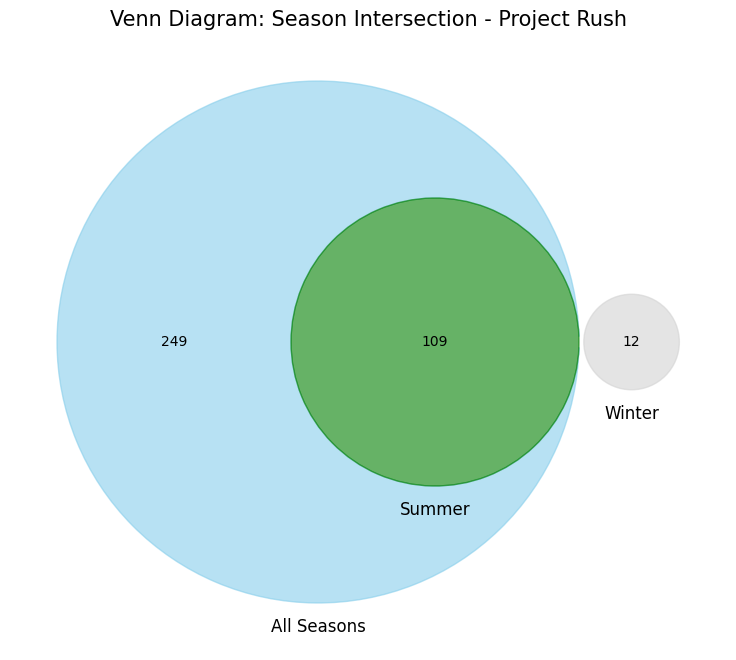

Total Sepatu: 428
Irisan Summer & All Season: 109
Winter Only: 12


In [64]:
# Subset counts
'''

- huruf A pada subset menunjukan kehadiran all seasons dalam subset tersebut; A = all seasons == 1, a = all seasons == 0
- huruf B pada subset menunjukan kehadiran summer dalam subset tersebut; B = summer == 1, b = summer == 0
- huruf C pada subset menunjukan kehadiran winter dalam subset tersebut; C = winter == 1, c = winter == 0

'''
Abc = len(df[(df['is_all_season'] == 1) & (df['is_summer'] == 0) & (df['is_winter'] == 0)]) 
aBc = len(df[(df['is_all_season'] == 0) & (df['is_summer'] == 1) & (df['is_winter'] == 0)]) 
ABc = len(df[(df['is_all_season'] == 1) & (df['is_summer'] == 1) & (df['is_winter'] == 0)]) 
abC = len(df[(df['is_all_season'] == 0) & (df['is_summer'] == 0) & (df['is_winter'] == 1)]) 
AbC = len(df[(df['is_all_season'] == 1) & (df['is_summer'] == 0) & (df['is_winter'] == 1)]) 
aBC = len(df[(df['is_all_season'] == 0) & (df['is_summer'] == 1) & (df['is_winter'] == 1)]) 
ABC = len(df[(df['is_all_season'] == 1) & (df['is_summer'] == 1) & (df['is_winter'] == 1)]) 

# Plotting
plt.figure(figsize=(10, 8))
v = venn3(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), 
          set_labels = ('All Seasons', 'Summer', 'Winter'),
          alpha = 0.6)

if v.get_patch_by_id('100'): v.get_patch_by_id('100').set_color('skyblue')
if v.get_patch_by_id('010'): v.get_patch_by_id('010').set_color('orange')
if v.get_patch_by_id('001'): v.get_patch_by_id('001').set_color('lightgrey')
if v.get_patch_by_id('110'): v.get_patch_by_id('110').set_color('green')

plt.title("Venn Diagram: Season Intersection - Project Rush", fontsize=15)
plt.show()

# Verify
print(f"Total Sepatu: {len(df)}")
print(f"Irisan Summer & All Season: {ABc}")
print(f"Winter Only: {abC}")

- Summer shoes adalah sepatu yang berfokus pada feature breathable pada sepatu, hal ini membuat sepatu yang cocok untuk summer (karena terasa sejuk di kaki) secara otomatis nyaman dipakai di semua musim. 
- Winter shoes adalah sepatu yang berfokus pada insulasi untuk menjaga panas sehingga membutuh breathability berkategori warm. 

In [65]:
# Correlation between summer shoes with breathability category
ct_summer_breathability = pd.crosstab(df['is_summer'], df['breathability'], normalize='index') * 100
print("--- Korelasi Sepatu Summer vs Kategori Breathability (%) ---")
print(ct_summer_breathability.round(5))

--- Korelasi Sepatu Summer vs Kategori Breathability (%) ---
breathability         -  breathable  moderate      warm
is_summer                                              
0              18.18182         0.0  65.20376  16.61442
1               0.00000       100.0   0.00000   0.00000


In [66]:
# Correlation between winter shoes with breathability category
ct_winter_breathability = pd.crosstab(df['is_winter'], df['breathability'], normalize='index') * 100
print("--- Korelasi Sepatu Winter vs Kategori Breathability (%) ---")
print(ct_winter_breathability.round(5))

--- Korelasi Sepatu Winter vs Kategori Breathability (%) ---
breathability         -  breathable  moderate       warm
is_winter                                               
0              13.94231    26.20192      50.0    9.85577
1               0.00000     0.00000       0.0  100.00000


Untuk requirement dasar saat ini, dikarenakan main market target kita adalah orang orang Indonesia maka dari itu secara default akan dipasangkan untuk sepatu dengan kategori summer atau all seasons.

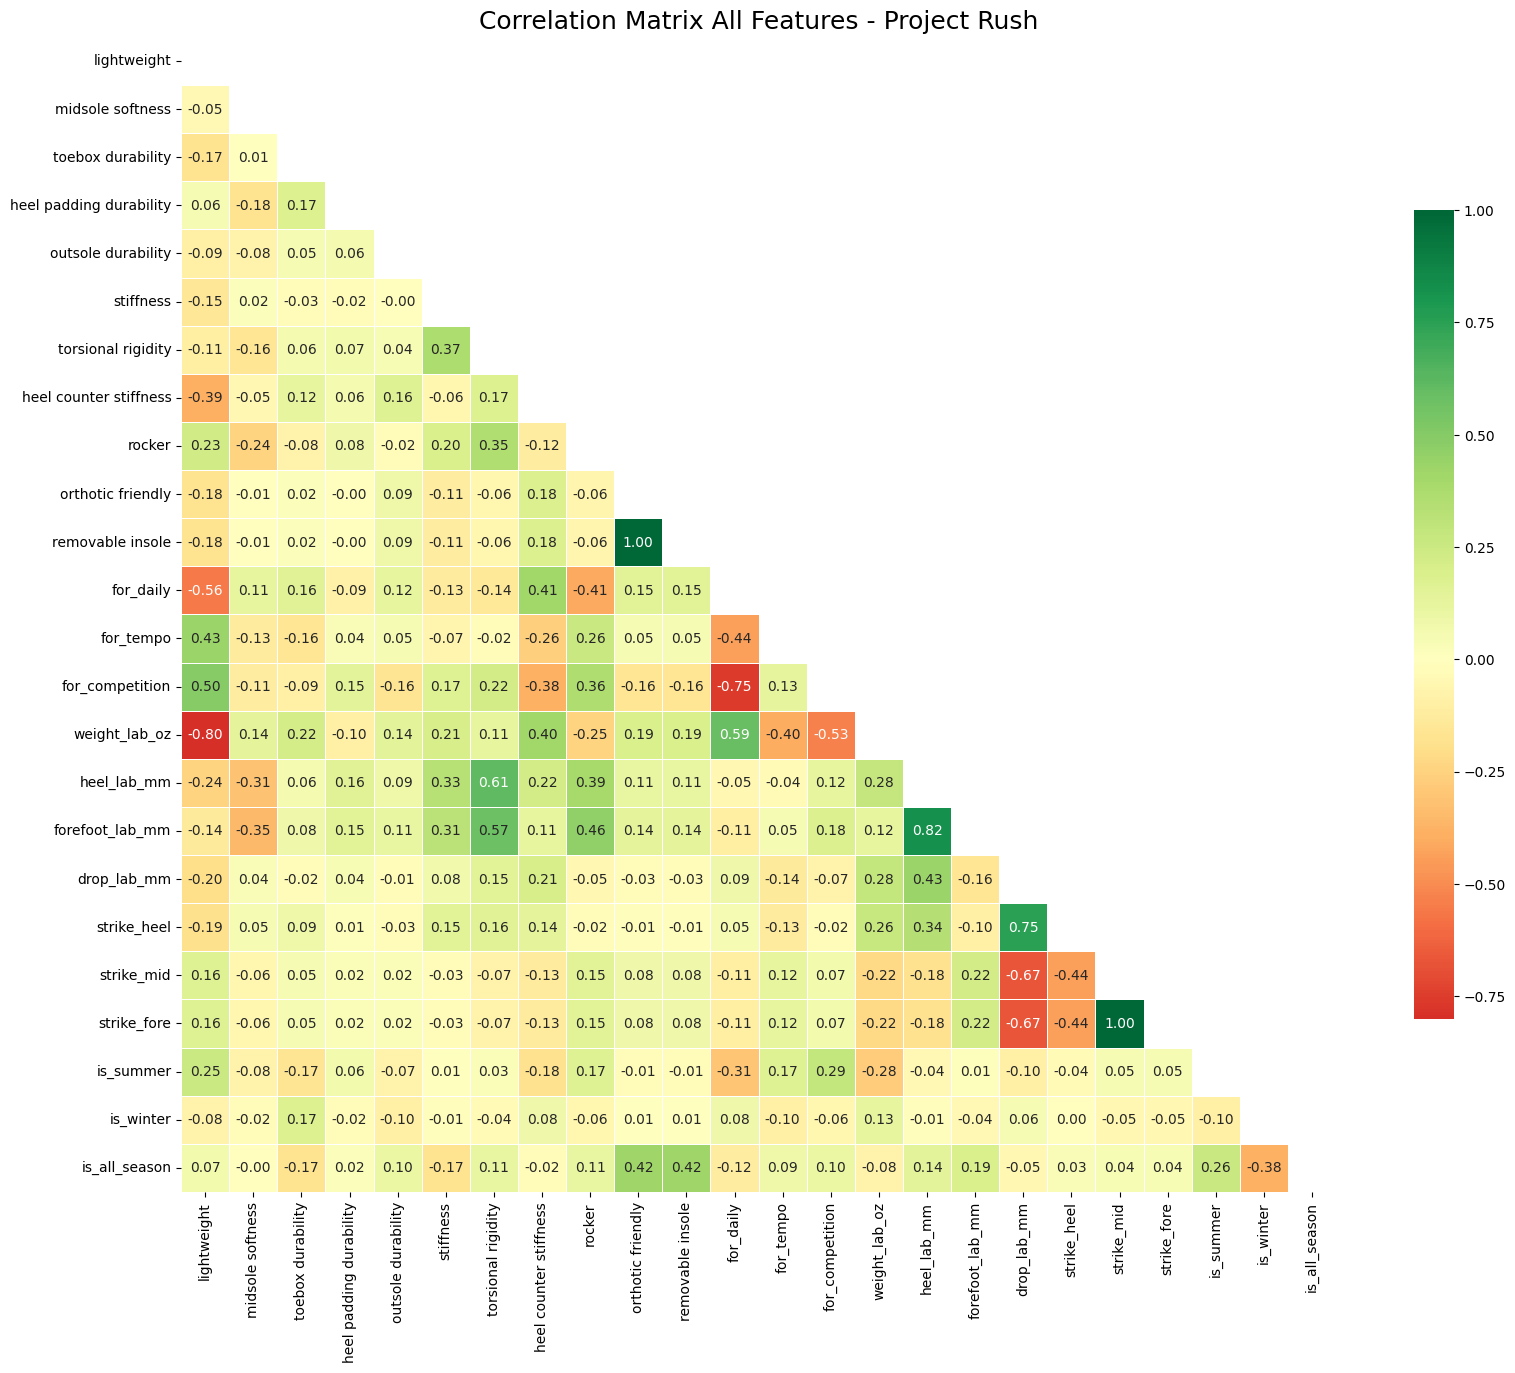

In [67]:
import numpy as np

# Final Correlation Check
ordinal_map = {
    'midsole softness': {'soft': 1, 'balanced': 2, 'firm': 3},
    'stiffness': {'flexible': 1, 'moderate': 2, 'stiff': 3},
    'torsional rigidity': {'flexible': 1, 'moderate': 2, 'stiff': 3},
    'heel counter stiffness': {'flexible': 1, 'moderate': 2, 'stiff': 3},
    'toebox durability': {'bad': 1, 'decent': 2, 'good': 3},
    'heel padding durability': {'bad': 1, 'decent': 2, 'good': 3},
    'outsole durability': {'bad': 1, 'decent': 2, 'good': 3}
}

df_encoded = df.copy()
for col, mapping in ordinal_map.items():
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(mapping)

df_numeric = df_encoded.select_dtypes(include=[np.number])
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='RdYlGn', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

plt.title('Correlation Matrix All Features - Project Rush', fontsize=18)
plt.show()

# Preprocessing Data

Di tahap ini, akan dilakukan encoding (One-Hot dan Ordinal), feature selection, dan pembersihan data jika diperlukan

In [68]:
df = pre_eda_df.copy()

In [69]:
print(df.head(20))
print(len(df))

     brand                   name                pace    arch support  \
0   brooks               launch 9  daily runningtempo         neutral   
1   brooks             levitate 6       daily running         neutral   
2   adidas                  4dfwd       daily running         neutral   
3   adidas                4dfwd 2       daily running         neutral   
4   adidas                4dfwd 3       daily running         neutral   
5   brooks       addiction gts 15       daily running  motion control   
6   adidas     adidas adizero sl2  daily runningtempo         neutral   
7   adidas                adistar       daily running         neutral   
8   adidas            adistar 2.0       daily running         neutral   
9   adidas              adistar 3       daily running         neutral   
10  adidas        adizero adios 7               tempo         neutral   
11  adidas        adizero adios 8               tempo         neutral   
12  adidas        adizero adios 9    competitiontem

In [70]:
# print(df.at[281, 'name'])

In [71]:
# rename column that is named "brand name" for naming convention
df.at[6, 'name'] = 'adizero sl2'
df.at[10, 'name'] = 'wave horizon 7'

In [72]:
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   brand                        428 non-null    str  
 1   name                         428 non-null    str  
 2   pace                         428 non-null    str  
 3   arch support                 428 non-null    str  
 4   weight lab weight brand      428 non-null    str  
 5   lightweight                  428 non-null    int64
 6   drop lab drop brand          428 non-null    str  
 7   strike pattern               428 non-null    str  
 8   size                         428 non-null    str  
 9   midsole softness             428 non-null    str  
 10  toebox durability            428 non-null    str  
 11  heel padding durability      428 non-null    str  
 12  outsole durability           428 non-null    str  
 13  breathability                428 non-null    str  
 14  width / fi

## Pace

In [73]:
print(df["pace"].value_counts())

pace
daily running         294
daily runningtempo     53
tempo                  31
competition            30
competitiontempo       20
Name: count, dtype: int64


In [74]:
df['pace'] = df['pace'].astype(str).str.lower()
base_pace = ['daily running', 'tempo', 'competition']

for level in base_pace:
    column_name = f"pace_{level.replace(' ', '_')}"
    df[column_name] = df['pace'].str.contains(level, na=False).astype(int)

print("Rows:", len(df))

pace_cols = [f"pace_{l.replace(' ', '_')}" for l in base_pace]
zero_vector_count = (df[pace_cols].sum(axis=1) == 0).sum()
print(f"NULL Value: {zero_vector_count}")

print("\nSample Comparison:")
print(df[df[pace_cols].sum(axis=1) > 1][['pace'] + pace_cols].head())

Rows: 428
NULL Value: 0

Sample Comparison:
                  pace  pace_daily_running  pace_tempo  pace_competition
0   daily runningtempo                   1           1                 0
6   daily runningtempo                   1           1                 0
12    competitiontempo                   0           1                 1
18    competitiontempo                   0           1                 1
19  daily runningtempo                   1           1                 0


In [75]:
print("\nValue Counts Kolom Asli:")
print(df["pace"].value_counts())

print()
for col in pace_cols:
    print(f"{col} sum:", int(df[col].sum()))

print()
print(df[["pace"] + pace_cols].head())


Value Counts Kolom Asli:
pace
daily running         294
daily runningtempo     53
tempo                  31
competition            30
competitiontempo       20
Name: count, dtype: int64

pace_daily_running sum: 347
pace_tempo sum: 104
pace_competition sum: 50

                 pace  pace_daily_running  pace_tempo  pace_competition
0  daily runningtempo                   1           1                 0
1       daily running                   1           0                 0
2       daily running                   1           0                 0
3       daily running                   1           0                 0
4       daily running                   1           0                 0


In [76]:
df.drop(columns=["pace"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   brand                        428 non-null    str  
 1   name                         428 non-null    str  
 2   arch support                 428 non-null    str  
 3   weight lab weight brand      428 non-null    str  
 4   lightweight                  428 non-null    int64
 5   drop lab drop brand          428 non-null    str  
 6   strike pattern               428 non-null    str  
 7   size                         428 non-null    str  
 8   midsole softness             428 non-null    str  
 9   toebox durability            428 non-null    str  
 10  heel padding durability      428 non-null    str  
 11  outsole durability           428 non-null    str  
 12  breathability                428 non-null    str  
 13  width / fit                  428 non-null    str  
 14  toebox wid

## Arch support

In [77]:
print(df["arch support"].value_counts())

arch support
neutral           366
stability          61
motion control      1
Name: count, dtype: int64


In [78]:
df['arch support'] = df['arch support'].astype(str).str.lower().str.replace('motion control', 'stability', regex=False)
base_arch = ['neutral', 'stability']

for level in base_arch:
    column_name = f"arch_{level}"
    df[column_name] = df['arch support'].str.contains(level, na=False).astype(int)

print("Rows:", len(df))

arch_cols = [f"arch_{l}" for l in base_arch]
zero_vector_count = (df[arch_cols].sum(axis=1) == 0).sum()
print(f"NULL Value: {zero_vector_count}")

print("\nSample Comparison:")
print(df[["arch support"] + arch_cols].head(10))

Rows: 428
NULL Value: 0

Sample Comparison:
  arch support  arch_neutral  arch_stability
0      neutral             1               0
1      neutral             1               0
2      neutral             1               0
3      neutral             1               0
4      neutral             1               0
5    stability             0               1
6      neutral             1               0
7      neutral             1               0
8      neutral             1               0
9      neutral             1               0


In [79]:
print(df["arch support"].value_counts())

print()
for level in base_arch:
    col = f"arch_{level}"
    print(f"{col} sum:", int(df[col].sum()))

print()
print(df[["arch support"] + arch_cols].head())

arch support
neutral      366
stability     62
Name: count, dtype: int64

arch_neutral sum: 366
arch_stability sum: 62

  arch support  arch_neutral  arch_stability
0      neutral             1               0
1      neutral             1               0
2      neutral             1               0
3      neutral             1               0
4      neutral             1               0


In [80]:
df.drop(columns=["arch support"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   brand                        428 non-null    str  
 1   name                         428 non-null    str  
 2   weight lab weight brand      428 non-null    str  
 3   lightweight                  428 non-null    int64
 4   drop lab drop brand          428 non-null    str  
 5   strike pattern               428 non-null    str  
 6   size                         428 non-null    str  
 7   midsole softness             428 non-null    str  
 8   toebox durability            428 non-null    str  
 9   heel padding durability      428 non-null    str  
 10  outsole durability           428 non-null    str  
 11  breathability                428 non-null    str  
 12  width / fit                  428 non-null    str  
 13  toebox width                 428 non-null    str  
 14  stiffness 

## Weight lab Weight brand

In [81]:
mask_missing = (
    df["weight lab weight brand"].isna() |
    (df["weight lab weight brand"].astype(str).str.strip() == "-")
)
mask_missing.sum()

np.int64(0)

In [82]:
weight = df["weight lab weight brand"].str.findall(r"[\d.]+")
df[["weight_lab_oz", "weight_lab_g", "weight_brand_oz", "weight_brand_g"]] = (
    pd.DataFrame(weight.tolist(), index=df.index)
)

for col in ["weight_lab_oz", "weight_lab_g", "weight_brand_oz", "weight_brand_g"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df[["weight lab weight brand", "weight_lab_oz", "weight_lab_g", "weight_brand_oz", "weight_brand_g"]].head())

         weight lab weight brand  weight_lab_oz  weight_lab_g  \
0    7.9 oz / 225g 8.1 oz / 230g            7.9           225   
1  10.7 oz / 304g 10.9 oz / 309g           10.7           304   
2  11.9 oz / 336g 11.5 oz / 327g           11.9           336   
3  12.6 oz / 356g 12.4 oz / 352g           12.6           356   
4  12.3 oz / 348g 12.2 oz / 345g           12.3           348   

   weight_brand_oz  weight_brand_g  
0              8.1           230.0  
1             10.9           309.0  
2             11.5           327.0  
3             12.4           352.0  
4             12.2           345.0  


In [83]:
df.drop(columns=["weight lab weight brand",], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   drop lab drop brand          428 non-null    str    
 4   strike pattern               428 non-null    str    
 5   size                         428 non-null    str    
 6   midsole softness             428 non-null    str    
 7   toebox durability            428 non-null    str    
 8   heel padding durability      428 non-null    str    
 9   outsole durability           428 non-null    str    
 10  breathability                428 non-null    str    
 11  width / fit                  428 non-null    str    
 12  toebox width                 428 non-null    str    
 13  stiffness                    428 non

## Drop lab Drop brand

In [84]:
mask_missing = (
    df["drop lab drop brand"].isna() |
    (df["drop lab drop brand"].astype(str).str.strip() == "-")
)
mask_missing.sum()

np.int64(0)

In [85]:
drop = df["drop lab drop brand"].str.findall(r"[\d.]+")

df[["drop_lab_mm", "drop_brand_mm"]] = (
    pd.DataFrame(drop.tolist(), index=df.index)
)

for col in ["drop_lab_mm", "drop_brand_mm"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df[["drop lab drop brand", "drop_lab_mm", "drop_brand_mm"]].head())

  drop lab drop brand  drop_lab_mm  drop_brand_mm
0      9.4 mm 10.0 mm          9.4           10.0
1       7.7 mm 8.0 mm          7.7            8.0
2      8.9 mm 10.0 mm          8.9           10.0
3     10.6 mm 11.0 mm         10.6           11.0
4      9.9 mm 10.0 mm          9.9           10.0


In [86]:
df.drop(columns=["drop lab drop brand"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   strike pattern               428 non-null    str    
 4   size                         428 non-null    str    
 5   midsole softness             428 non-null    str    
 6   toebox durability            428 non-null    str    
 7   heel padding durability      428 non-null    str    
 8   outsole durability           428 non-null    str    
 9   breathability                428 non-null    str    
 10  width / fit                  428 non-null    str    
 11  toebox width                 428 non-null    str    
 12  stiffness                    428 non-null    str    
 13  torsional rigidity           428 non

## Strike pattern

In [87]:
print(df["strike pattern"].value_counts())

strike pattern
heelmid/forefoot     162
mid/forefoot         142
heel                 122
-                      1
heel mid/forefoot      1
Name: count, dtype: int64


In [88]:
df['strike pattern'] = df['strike pattern'].astype(str).str.lower()
base_strikes = ['heel', 'mid', 'forefoot']

for strike in base_strikes:
    column_name = f"strike_{strike}"
   
    df[column_name] = df['strike pattern'].str.contains(strike, na=False).astype(int)

print("Rows:", len(df))

print("\nUnique Values in original column:")
print(df["strike pattern"].unique())

print("\nSample Comparison (Multi-label Mapping):")
strike_cols = [f"strike_{s}" for s in base_strikes]
print(df[["strike pattern"] + strike_cols].head(10))

Rows: 428

Unique Values in original column:
<StringArray>
['heelmid/forefoot', 'mid/forefoot', 'heel', '-', 'heel mid/forefoot']
Length: 5, dtype: str

Sample Comparison (Multi-label Mapping):
     strike pattern  strike_heel  strike_mid  strike_forefoot
0  heelmid/forefoot            1           1                1
1      mid/forefoot            0           1                1
2  heelmid/forefoot            1           1                1
3              heel            1           0                0
4  heelmid/forefoot            1           1                1
5              heel            1           0                0
6  heelmid/forefoot            1           1                1
7  heelmid/forefoot            1           1                1
8  heelmid/forefoot            1           1                1
9              heel            1           0                0


In [89]:
print(df["strike pattern"].value_counts())

print()
for strike in base_strikes:
    col = f"strike_{strike}"
    print(f"{col} sum:", int(df[col].sum()))

print()
print(df[["strike pattern"] + strike_cols].head())

strike pattern
heelmid/forefoot     162
mid/forefoot         142
heel                 122
-                      1
heel mid/forefoot      1
Name: count, dtype: int64

strike_heel sum: 285
strike_mid sum: 305
strike_forefoot sum: 305

     strike pattern  strike_heel  strike_mid  strike_forefoot
0  heelmid/forefoot            1           1                1
1      mid/forefoot            0           1                1
2  heelmid/forefoot            1           1                1
3              heel            1           0                0
4  heelmid/forefoot            1           1                1


In [90]:
df.drop(columns=['strike pattern'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   size                         428 non-null    str    
 4   midsole softness             428 non-null    str    
 5   toebox durability            428 non-null    str    
 6   heel padding durability      428 non-null    str    
 7   outsole durability           428 non-null    str    
 8   breathability                428 non-null    str    
 9   width / fit                  428 non-null    str    
 10  toebox width                 428 non-null    str    
 11  stiffness                    428 non-null    str    
 12  torsional rigidity           428 non-null    str    
 13  heel counter stiffness       428 non

## Midsole softness

In [91]:
print(df["midsole softness"].value_counts())

midsole softness
soft        177
balanced    172
-            61
firm         18
Name: count, dtype: int64


In [92]:
softness_scaled = {
    "firm": 1,
    "balanced": 3,
    "soft": 5,
    "-": 0,
    "0": 0
}

df['midsole_softness'] = df['midsole softness'].map(softness_scaled)

print("--- Value Counts Kolom Asli ---")
print(df["midsole softness"].value_counts())

print("\n--- Sebaran Nilai Hasil Ordinal ---")
counts = df["midsole_softness"].value_counts().sort_index()
for i in range(6):
    print(f"Index {i}: {counts.get(i, 0)} baris")

print("\n--- Perbandingan Data (Head) ---")
print(df[["midsole softness", "midsole_softness"]].head())

--- Value Counts Kolom Asli ---
midsole softness
soft        177
balanced    172
-            61
firm         18
Name: count, dtype: int64

--- Sebaran Nilai Hasil Ordinal ---
Index 0: 61 baris
Index 1: 18 baris
Index 2: 0 baris
Index 3: 172 baris
Index 4: 0 baris
Index 5: 177 baris

--- Perbandingan Data (Head) ---
  midsole softness  midsole_softness
0         balanced                 3
1             soft                 5
2             firm                 1
3             firm                 1
4             firm                 1


In [93]:
df.drop(columns=["midsole softness"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   size                         428 non-null    str    
 4   toebox durability            428 non-null    str    
 5   heel padding durability      428 non-null    str    
 6   outsole durability           428 non-null    str    
 7   breathability                428 non-null    str    
 8   width / fit                  428 non-null    str    
 9   toebox width                 428 non-null    str    
 10  stiffness                    428 non-null    str    
 11  torsional rigidity           428 non-null    str    
 12  heel counter stiffness       428 non-null    str    
 13  plate                        428 non

## Toebox durability

In [94]:
print(df['toebox durability'].value_counts())

toebox durability
decent    150
-         117
bad        88
good       73
Name: count, dtype: int64


In [95]:
durability_map = {
    "-": 0,
    "very bad": 1,
    "bad": 2,
    "decent": 3,
    "good": 4,
    "very good": 5
}

df['toebox_durability'] = df['toebox durability'].map(durability_map)
print("Rows:", len(df))

print("\nUnique Values mapping check:")
for label, value in durability_map.items():
    count = (df['toebox durability'] == label).sum()
    print(f"'{label}' di-encode menjadi {value} (Total: {count})")

print("\nSample Data:")
print(df[["toebox durability", "toebox_durability"]].head(10))

Rows: 428

Unique Values mapping check:
'-' di-encode menjadi 0 (Total: 117)
'very bad' di-encode menjadi 1 (Total: 0)
'bad' di-encode menjadi 2 (Total: 88)
'decent' di-encode menjadi 3 (Total: 150)
'good' di-encode menjadi 4 (Total: 73)
'very good' di-encode menjadi 5 (Total: 0)

Sample Data:
  toebox durability  toebox_durability
0                 -                  0
1              good                  4
2                 -                  0
3                 -                  0
4              good                  4
5            decent                  3
6               bad                  2
7            decent                  3
8               bad                  2
9               bad                  2


In [96]:
df.drop(columns=['toebox durability'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   size                         428 non-null    str    
 4   heel padding durability      428 non-null    str    
 5   outsole durability           428 non-null    str    
 6   breathability                428 non-null    str    
 7   width / fit                  428 non-null    str    
 8   toebox width                 428 non-null    str    
 9   stiffness                    428 non-null    str    
 10  torsional rigidity           428 non-null    str    
 11  heel counter stiffness       428 non-null    str    
 12  plate                        428 non-null    str    
 13  rocker                       428 non

## Heel padding durability

In [97]:
print(df["heel padding durability"].value_counts())

heel padding durability
good      179
-         122
decent     77
bad        50
Name: count, dtype: int64


In [98]:
df['heel padding durability'] = df['heel padding durability'].astype(str).str.lower()

durability_scale_5 = {
    "-": 0,
    "very bad": 1,
    "bad": 2,
    "decent": 3,
    "good": 4,
    "very good": 5
}


df['heel_durability'] = df['heel padding durability'].map(durability_scale_5)


print("--- Value Counts Kolom Asli ---")
print(df["heel padding durability"].value_counts())

print("\n--- Sebaran Nilai Hasil Ordinal (Scale 1-5) ---")
counts = df["heel_durability"].value_counts().sort_index()
for i in range(6):
    print(f"Index {i}: {counts.get(i, 0)} baris")

print("\n--- Perbandingan Data (Head) ---")
print(df[["heel padding durability", "heel_durability"]].head())

--- Value Counts Kolom Asli ---
heel padding durability
good      179
-         122
decent     77
bad        50
Name: count, dtype: int64

--- Sebaran Nilai Hasil Ordinal (Scale 1-5) ---
Index 0: 122 baris
Index 1: 0 baris
Index 2: 50 baris
Index 3: 77 baris
Index 4: 179 baris
Index 5: 0 baris

--- Perbandingan Data (Head) ---
  heel padding durability  heel_durability
0                       -                0
1                    good                4
2                    good                4
3                       -                0
4                    good                4


In [99]:
df.drop('heel padding durability', axis=1, inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   size                         428 non-null    str    
 4   outsole durability           428 non-null    str    
 5   breathability                428 non-null    str    
 6   width / fit                  428 non-null    str    
 7   toebox width                 428 non-null    str    
 8   stiffness                    428 non-null    str    
 9   torsional rigidity           428 non-null    str    
 10  heel counter stiffness       428 non-null    str    
 11  plate                        428 non-null    str    
 12  rocker                       428 non-null    int64  
 13  heel lab heel brand          428 non

## Outsole durability

In [100]:
print(df["outsole durability"].value_counts())

outsole durability
good      206
-         134
decent     67
bad        21
Name: count, dtype: int64


In [101]:
durability_scaled = {
    "-": 0,
    "very bad": 1,
    "bad": 2,
    "decent": 3,
    "good": 4,
    "very good": 5
}


df['outsole_durability'] = df['outsole durability'].map(durability_scaled)
print("--- Value Counts Kolom Asli ---")
print(df["outsole durability"].value_counts())

print("\n--- Sebaran Nilai Hasil Ordinal (Scale 1-5) ---")
counts = df["outsole_durability"].value_counts().sort_index()
for i in range(6):
    print(f"Index {i}: {counts.get(i, 0)} baris")

print("\n--- Perbandingan Data (Head) ---")
print(df[["outsole durability", "outsole_durability"]].head())

--- Value Counts Kolom Asli ---
outsole durability
good      206
-         134
decent     67
bad        21
Name: count, dtype: int64

--- Sebaran Nilai Hasil Ordinal (Scale 1-5) ---
Index 0: 134 baris
Index 1: 0 baris
Index 2: 21 baris
Index 3: 67 baris
Index 4: 206 baris
Index 5: 0 baris

--- Perbandingan Data (Head) ---
  outsole durability  outsole_durability
0                  -                   0
1               good                   4
2                  -                   0
3                  -                   0
4               good                   4


In [102]:
df.drop('outsole durability', axis=1, inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   size                         428 non-null    str    
 4   breathability                428 non-null    str    
 5   width / fit                  428 non-null    str    
 6   toebox width                 428 non-null    str    
 7   stiffness                    428 non-null    str    
 8   torsional rigidity           428 non-null    str    
 9   heel counter stiffness       428 non-null    str    
 10  plate                        428 non-null    str    
 11  rocker                       428 non-null    int64  
 12  heel lab heel brand          428 non-null    str    
 13  forefoot lab forefoot brand  428 non

## Breathability

In [103]:
print(df["breathability"].value_counts())

breathability
moderate      208
breathable    109
-              58
warm           53
Name: count, dtype: int64


In [104]:
breathability_scaled = {
    "-": 0,
    # "suffocating": 1,
    "warm": 1,
    "moderate": 3,
    "good": 4,
    "breathable": 5
}

df['breathability_scaled'] = df['breathability'].map(breathability_scaled)

print("--- Value Counts Kolom Asli ---")
print(df["breathability"].value_counts())

print("\n--- Sebaran Nilai Hasil Ordinal ---")
counts = df["breathability_scaled"].value_counts().sort_index()
for i in range(6):
    print(f"Index {i}: {counts.get(i, 0)} baris")

print("\n--- Perbandingan Data (Head) ---")
print(df[["breathability", "breathability_scaled"]].head())

--- Value Counts Kolom Asli ---
breathability
moderate      208
breathable    109
-              58
warm           53
Name: count, dtype: int64

--- Sebaran Nilai Hasil Ordinal ---
Index 0: 58 baris
Index 1: 53 baris
Index 2: 0 baris
Index 3: 208 baris
Index 4: 0 baris
Index 5: 109 baris

--- Perbandingan Data (Head) ---
  breathability  breathability_scaled
0             -                     0
1    breathable                     5
2          warm                     1
3          warm                     1
4          warm                     1


In [105]:
df.drop('breathability', axis=1, inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   size                         428 non-null    str    
 4   width / fit                  428 non-null    str    
 5   toebox width                 428 non-null    str    
 6   stiffness                    428 non-null    str    
 7   torsional rigidity           428 non-null    str    
 8   heel counter stiffness       428 non-null    str    
 9   plate                        428 non-null    str    
 10  rocker                       428 non-null    int64  
 11  heel lab heel brand          428 non-null    str    
 12  forefoot lab forefoot brand  428 non-null    str    
 13  widths available             428 non

## Width / fit

In [106]:
print(df['width / fit'].value_counts())

width / fit
medium    256
narrow    140
wide       32
Name: count, dtype: int64


In [107]:
width_scaled = {
    "narrow": 1,
    "medium": 3,
    "wide": 5,
    "-": 0,
    "0": 0
}

df['width_fit'] = df['width / fit'].map(width_scaled)

print("--- Value Counts Kolom Asli ---")
print(df["width / fit"].value_counts())

print("\n--- Sebaran Nilai Hasil Ordinal ---")
counts = df["width_fit"].value_counts().sort_index()
for i in range(6):
    print(f"Index {i}: {counts.get(i, 0)} baris")

print("\n--- Perbandingan Data (Head) ---")
print(df[["width / fit", "width_fit"]].head())

--- Value Counts Kolom Asli ---
width / fit
medium    256
narrow    140
wide       32
Name: count, dtype: int64

--- Sebaran Nilai Hasil Ordinal ---
Index 0: 0 baris
Index 1: 140 baris
Index 2: 0 baris
Index 3: 256 baris
Index 4: 0 baris
Index 5: 32 baris

--- Perbandingan Data (Head) ---
  width / fit  width_fit
0      narrow          1
1      narrow          1
2      narrow          1
3      narrow          1
4      narrow          1


In [108]:
df.drop(columns=["size", "widths available", "width / fit"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   toebox width                 428 non-null    str    
 4   stiffness                    428 non-null    str    
 5   torsional rigidity           428 non-null    str    
 6   heel counter stiffness       428 non-null    str    
 7   plate                        428 non-null    str    
 8   rocker                       428 non-null    int64  
 9   heel lab heel brand          428 non-null    str    
 10  forefoot lab forefoot brand  428 non-null    str    
 11  orthotic friendly            428 non-null    int64  
 12  season                       428 non-null    str    
 13  removable insole             428 non

## Toebox width

In [109]:
print(df['toebox width'].value_counts())

toebox width
medium    204
-         108
wide       61
narrow     55
Name: count, dtype: int64


In [110]:
toebox_scaled = {
    "narrow": 1,
    "medium": 3,
    "wide": 5,
    "-": 0,
    "0": 0
}

df['toebox_width'] = df['toebox width'].map(toebox_scaled)

print("--- Value Counts Kolom Asli ---")
print(df["toebox width"].value_counts())

print("\n--- Sebaran Nilai Hasil Ordinal ---")
counts = df["toebox_width"].value_counts().sort_index()
for i in range(6):
    print(f"Index {i}: {counts.get(i, 0)} baris")

print("\n--- Perbandingan Data (Head) ---")
print(df[["toebox width", "toebox_width"]].head())

--- Value Counts Kolom Asli ---
toebox width
medium    204
-         108
wide       61
narrow     55
Name: count, dtype: int64

--- Sebaran Nilai Hasil Ordinal ---
Index 0: 108 baris
Index 1: 55 baris
Index 2: 0 baris
Index 3: 204 baris
Index 4: 0 baris
Index 5: 61 baris

--- Perbandingan Data (Head) ---
  toebox width  toebox_width
0            -             0
1       medium             3
2            -             0
3            -             0
4       medium             3


In [111]:
df.drop(columns=["toebox width"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   stiffness                    428 non-null    str    
 4   torsional rigidity           428 non-null    str    
 5   heel counter stiffness       428 non-null    str    
 6   plate                        428 non-null    str    
 7   rocker                       428 non-null    int64  
 8   heel lab heel brand          428 non-null    str    
 9   forefoot lab forefoot brand  428 non-null    str    
 10  orthotic friendly            428 non-null    int64  
 11  season                       428 non-null    str    
 12  removable insole             428 non-null    int64  
 13  pace_daily_running           428 non

## Stiffness

In [112]:
print(df['stiffness'].value_counts())

stiffness
stiff       217
moderate    163
flexible     35
-            13
Name: count, dtype: int64


In [113]:
stiffness_scaled = {
    "flexible": 1,
    "moderate": 3,
    "stiff": 5,
    "-": 0,
    "0": 0
}

df['stiffness_scaled'] = df['stiffness'].map(stiffness_scaled)

print("--- Value Counts Kolom Asli ---")
print(df["stiffness"].value_counts())

print("\n--- Sebaran Nilai Hasil Ordinal  ---")
counts = df["stiffness_scaled"].value_counts().sort_index()
for i in range(6):
    print(f"Index {i}: {counts.get(i, 0)} baris")

print("\n--- Perbandingan Data ---")
print(df[["stiffness", "stiffness_scaled"]].head())

--- Value Counts Kolom Asli ---
stiffness
stiff       217
moderate    163
flexible     35
-            13
Name: count, dtype: int64

--- Sebaran Nilai Hasil Ordinal  ---
Index 0: 13 baris
Index 1: 35 baris
Index 2: 0 baris
Index 3: 163 baris
Index 4: 0 baris
Index 5: 217 baris

--- Perbandingan Data ---
  stiffness  stiffness_scaled
0     stiff                 5
1     stiff                 5
2     stiff                 5
3     stiff                 5
4  moderate                 3


In [114]:
df.drop(columns=["stiffness"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   torsional rigidity           428 non-null    str    
 4   heel counter stiffness       428 non-null    str    
 5   plate                        428 non-null    str    
 6   rocker                       428 non-null    int64  
 7   heel lab heel brand          428 non-null    str    
 8   forefoot lab forefoot brand  428 non-null    str    
 9   orthotic friendly            428 non-null    int64  
 10  season                       428 non-null    str    
 11  removable insole             428 non-null    int64  
 12  pace_daily_running           428 non-null    int64  
 13  pace_tempo                   428 non

## Torsional rigidity

In [115]:
print(df['torsional rigidity'].value_counts())

torsional rigidity
stiff       213
moderate    123
flexible     74
-            18
Name: count, dtype: int64


In [116]:
torsional_scaled = {
    "flexible": 1,
    "moderate": 3,
    "stiff": 5,
    "-": 0,
    "0": 0,
    "nan": 0 
}

df['torsional_rigidity'] = df['torsional rigidity'].map(torsional_scaled).fillna(0).astype(int)

print("--- Value Counts Kolom Asli ---")
print(df["torsional rigidity"].value_counts())

print("\n--- Sebaran Nilai Hasil Ordinal (Scale 0-5) ---")
counts = df["torsional_rigidity"].value_counts().sort_index()
for i in range(6):
    print(f"Index {i}: {counts.get(i, 0)} baris")

print("\n--- Perbandingan Data (Head) ---")
print(df[["torsional rigidity", "torsional_rigidity"]].head())

--- Value Counts Kolom Asli ---
torsional rigidity
stiff       213
moderate    123
flexible     74
-            18
Name: count, dtype: int64

--- Sebaran Nilai Hasil Ordinal (Scale 0-5) ---
Index 0: 18 baris
Index 1: 74 baris
Index 2: 0 baris
Index 3: 123 baris
Index 4: 0 baris
Index 5: 213 baris

--- Perbandingan Data (Head) ---
  torsional rigidity  torsional_rigidity
0              stiff                   5
1           moderate                   3
2           flexible                   1
3           flexible                   1
4           flexible                   1


In [117]:
df.drop(columns=["torsional rigidity"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   heel counter stiffness       428 non-null    str    
 4   plate                        428 non-null    str    
 5   rocker                       428 non-null    int64  
 6   heel lab heel brand          428 non-null    str    
 7   forefoot lab forefoot brand  428 non-null    str    
 8   orthotic friendly            428 non-null    int64  
 9   season                       428 non-null    str    
 10  removable insole             428 non-null    int64  
 11  pace_daily_running           428 non-null    int64  
 12  pace_tempo                   428 non-null    int64  
 13  pace_competition             428 non

## Heel counter stiffness

In [118]:
print(df['heel counter stiffness'].value_counts())

heel counter stiffness
moderate    146
flexible    132
stiff       121
-            29
Name: count, dtype: int64


In [119]:
heel_stiff_map = {
    'flexible': 1,
    'moderate': 3,
    'stiff': 5
}

df['heel_stiff'] = df['heel counter stiffness'].map(heel_stiff_map).fillna(0).astype(int)

# Cek hasil
print(f"Rows: {len(df)}")
print(f"NULL Value (tidak cocok dengan kategori): {df['heel_stiff'].isna().sum()}")
print("\nSample Comparison:")
print(df[['heel counter stiffness', 'heel_stiff']].head(10))

Rows: 428
NULL Value (tidak cocok dengan kategori): 0

Sample Comparison:
  heel counter stiffness  heel_stiff
0               flexible           1
1               moderate           3
2               flexible           1
3               moderate           3
4               flexible           1
5               moderate           3
6               flexible           1
7               flexible           1
8                  stiff           5
9                  stiff           5


In [120]:
df.drop(columns=["heel counter stiffness"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   plate                        428 non-null    str    
 4   rocker                       428 non-null    int64  
 5   heel lab heel brand          428 non-null    str    
 6   forefoot lab forefoot brand  428 non-null    str    
 7   orthotic friendly            428 non-null    int64  
 8   season                       428 non-null    str    
 9   removable insole             428 non-null    int64  
 10  pace_daily_running           428 non-null    int64  
 11  pace_tempo                   428 non-null    int64  
 12  pace_competition             428 non-null    int64  
 13  arch_neutral                 428 non

## Plate

In [121]:
print(df["plate"].value_counts())

plate
0                         369
carbon plate               58
carbon platerock plate      1
Name: count, dtype: int64


In [122]:
df['plate'] = df['plate'].astype(str).str.lower()
base_plate = ['rock plate', 'carbon plate']

for level in base_plate:
    column_name = f"plate_{level.replace(' ', '_')}"
    df[column_name] = df['plate'].str.contains(level, na=False).astype(int)

print("Rows:", len(df))

plate_cols = [f"plate_{l.replace(' ', '_')}" for l in base_plate]
zero_vector_count = (df[plate_cols].sum(axis=1) == 0).sum()
print(f"NULL Value: {zero_vector_count}")

print("\nSample Comparison:")
print(df[["plate"] + plate_cols].head(10))

Rows: 428
NULL Value: 369

Sample Comparison:
  plate  plate_rock_plate  plate_carbon_plate
0     0                 0                   0
1     0                 0                   0
2     0                 0                   0
3     0                 0                   0
4     0                 0                   0
5     0                 0                   0
6     0                 0                   0
7     0                 0                   0
8     0                 0                   0
9     0                 0                   0


In [123]:
print(df["plate"].value_counts())

print()
for level in base_plate:
    col = f"plate_{level.replace(' ', '_')}"
    print(f"{col} sum:", int(df[col].sum()))

print()
print(df[["plate"] + plate_cols].head())

plate
0                         369
carbon plate               58
carbon platerock plate      1
Name: count, dtype: int64

plate_rock_plate sum: 1
plate_carbon_plate sum: 59

  plate  plate_rock_plate  plate_carbon_plate
0     0                 0                   0
1     0                 0                   0
2     0                 0                   0
3     0                 0                   0
4     0                 0                   0


In [124]:
df.drop(columns=["plate"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   rocker                       428 non-null    int64  
 4   heel lab heel brand          428 non-null    str    
 5   forefoot lab forefoot brand  428 non-null    str    
 6   orthotic friendly            428 non-null    int64  
 7   season                       428 non-null    str    
 8   removable insole             428 non-null    int64  
 9   pace_daily_running           428 non-null    int64  
 10  pace_tempo                   428 non-null    int64  
 11  pace_competition             428 non-null    int64  
 12  arch_neutral                 428 non-null    int64  
 13  arch_stability               428 non

## Rocker

In [125]:
print(df["rocker"].value_counts())

rocker
0    286
1    142
Name: count, dtype: int64


## Heel lab heel brand

In [126]:
print(df["heel lab heel brand"].head())

0    32.4 mm 36.0 mm
1    34.3 mm 32.5 mm
2    33.3 mm 32.5 mm
3    31.8 mm 32.0 mm
4    32.6 mm 34.0 mm
Name: heel lab heel brand, dtype: str


In [127]:
mask_missing = (
    df["heel lab heel brand"].isna() |
    (df["heel lab heel brand"].astype(str).str.strip() == "-")
)
mask_missing.sum()  

np.int64(0)

In [128]:
heel = df["heel lab heel brand"].str.findall(r"[\d.]+")

df[["heel_lab_mm", "heel_brand_mm"]] = (
    pd.DataFrame(heel.tolist(), index=df.index)
)

for col in ["heel_lab_mm", "heel_brand_mm"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df[["heel lab heel brand", "heel_lab_mm", "heel_brand_mm"]].head())

  heel lab heel brand  heel_lab_mm  heel_brand_mm
0     32.4 mm 36.0 mm         32.4           36.0
1     34.3 mm 32.5 mm         34.3           32.5
2     33.3 mm 32.5 mm         33.3           32.5
3     31.8 mm 32.0 mm         31.8           32.0
4     32.6 mm 34.0 mm         32.6           34.0


In [129]:
df.drop(columns=["heel lab heel brand"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        428 non-null    str    
 1   name                         428 non-null    str    
 2   lightweight                  428 non-null    int64  
 3   rocker                       428 non-null    int64  
 4   forefoot lab forefoot brand  428 non-null    str    
 5   orthotic friendly            428 non-null    int64  
 6   season                       428 non-null    str    
 7   removable insole             428 non-null    int64  
 8   pace_daily_running           428 non-null    int64  
 9   pace_tempo                   428 non-null    int64  
 10  pace_competition             428 non-null    int64  
 11  arch_neutral                 428 non-null    int64  
 12  arch_stability               428 non-null    int64  
 13  weight_lab_oz                428 non

## Forefoot lab Forefoot brand

In [130]:
print(df['forefoot lab forefoot brand'].head())

0    23.0 mm 26.0 mm
1    26.6 mm 24.5 mm
2    24.4 mm 22.5 mm
3    21.2 mm 21.0 mm
4    22.7 mm 24.0 mm
Name: forefoot lab forefoot brand, dtype: str


In [131]:
mask_missing = (
    df["forefoot lab forefoot brand"].isna() |
    (df["forefoot lab forefoot brand"].astype(str).str.strip() == "-")
)
mask_missing.sum()

np.int64(0)

In [132]:
forefoot = df["forefoot lab forefoot brand"].str.findall(r"[\d.]+")

df[["forefoot_lab_mm", "forefoot_brand_mm"]] = (
    pd.DataFrame(forefoot.tolist(), index=df.index)
)

for col in ["forefoot_lab_mm", "forefoot_brand_mm"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df[["forefoot lab forefoot brand", "forefoot_lab_mm", "forefoot_brand_mm"]].head())

  forefoot lab forefoot brand  forefoot_lab_mm  forefoot_brand_mm
0             23.0 mm 26.0 mm             23.0               26.0
1             26.6 mm 24.5 mm             26.6               24.5
2             24.4 mm 22.5 mm             24.4               22.5
3             21.2 mm 21.0 mm             21.2               21.0
4             22.7 mm 24.0 mm             22.7               24.0


In [133]:
df.drop(columns=["forefoot lab forefoot brand"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 428 non-null    str    
 1   name                  428 non-null    str    
 2   lightweight           428 non-null    int64  
 3   rocker                428 non-null    int64  
 4   orthotic friendly     428 non-null    int64  
 5   season                428 non-null    str    
 6   removable insole      428 non-null    int64  
 7   pace_daily_running    428 non-null    int64  
 8   pace_tempo            428 non-null    int64  
 9   pace_competition      428 non-null    int64  
 10  arch_neutral          428 non-null    int64  
 11  arch_stability        428 non-null    int64  
 12  weight_lab_oz         428 non-null    float64
 13  weight_lab_g          428 non-null    int64  
 14  weight_brand_oz       421 non-null    float64
 15  weight_brand_g        421 non-null    f

## Season

In [134]:
print(df["season"].value_counts())

season
all seasons          249
summerall seasons    109
-                     58
winter                12
Name: count, dtype: int64


In [135]:
# Check weird values
filter_condition = df['season'].astype(str).isin(['-', '0'])
rows_to_check = df[filter_condition]

print(f"Jumlah baris dengan '-' atau '0': {len(rows_to_check)}")
print("\n--- Detail Baris (season = '-' atau '0') ---")
print(rows_to_check[['brand', 'name', 'season']])


print("\nFrekuensi spesifik:")
print(df[df['season'].astype(str).isin(['-', '0'])]['season'].value_counts())

Jumlah baris dengan '-' atau '0': 58

--- Detail Baris (season = '-' atau '0') ---
           brand                         name season
0         brooks                     launch 9      -
13        adidas        adizero adios pro 2.0      -
25        brooks            adrenaline gts 22      -
34          nike  air zoom pegasus 38 flyease      -
47       saucony                         axon      -
82          nike               downshifter 11      -
85        adidas                    duramo 10      -
93       saucony              endorphin pro 3      -
97       saucony            endorphin shift 2      -
111         nike       flex experience run 10      -
114         nike                flex run 2021      -
115       reebok           floatride energy 3      -
121         nike                 free run 5.0      -
122      saucony                    freedom 4      -
123  new balance          fresh foam 1080 v11      -
125  new balance           fresh foam 860 v11      -
126  new balance

In [136]:
df['season'] = df['season'].astype(str).str.lower()
base_seasons = ['summer', 'winter', 'all seasons']

for level in base_seasons:
    clean_name = level.replace(' seasons', '').replace(' ', '_')
    column_name = f"season_{clean_name}"
    df[column_name] = df['season'].str.contains(level, na=False).astype(int)

print("Rows:", len(df))

season_cols = [col for col in df.columns if col.startswith('season_')]
zero_vector_count = (df[season_cols].sum(axis=1) == 0).sum()
print(f"NULL/Unknown Value (0 dan -): {zero_vector_count}")

print("\nSample Comparison (Multi-label):")
print(df[df[season_cols].sum(axis=1) > 1][['season'] + season_cols].head())

Rows: 428
NULL/Unknown Value (0 dan -): 58

Sample Comparison (Multi-label):
               season  season_summer  season_winter  season_all
1   summerall seasons              1              0           1
6   summerall seasons              1              0           1
8   summerall seasons              1              0           1
9   summerall seasons              1              0           1
10  summerall seasons              1              0           1


In [137]:
print(df["season"].value_counts())

print()
for col in season_cols:
    print(f"{col} sum:", int(df[col].sum()))

print()
print(df[["season"] + season_cols].head())

season
all seasons          249
summerall seasons    109
-                     58
winter                12
Name: count, dtype: int64

season_summer sum: 109
season_winter sum: 12
season_all sum: 358

              season  season_summer  season_winter  season_all
0                  -              0              0           0
1  summerall seasons              1              0           1
2        all seasons              0              0           1
3        all seasons              0              0           1
4        all seasons              0              0           1


In [138]:
df.drop(columns=["season"], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 428 non-null    str    
 1   name                  428 non-null    str    
 2   lightweight           428 non-null    int64  
 3   rocker                428 non-null    int64  
 4   orthotic friendly     428 non-null    int64  
 5   removable insole      428 non-null    int64  
 6   pace_daily_running    428 non-null    int64  
 7   pace_tempo            428 non-null    int64  
 8   pace_competition      428 non-null    int64  
 9   arch_neutral          428 non-null    int64  
 10  arch_stability        428 non-null    int64  
 11  weight_lab_oz         428 non-null    float64
 12  weight_lab_g          428 non-null    int64  
 13  weight_brand_oz       421 non-null    float64
 14  weight_brand_g        421 non-null    float64
 15  drop_lab_mm           428 non-null    f

In [139]:
print(df[["brand", "name", "removable insole", "orthotic friendly"]].head())

    brand        name  removable insole  orthotic friendly
0  brooks    launch 9                 1                  1
1  brooks  levitate 6                 1                  1
2  adidas       4dfwd                 1                  1
3  adidas     4dfwd 2                 1                  1
4  adidas     4dfwd 3                 1                  1


## Finishing

In [140]:
# Weight cuma pakai yg lab_oz
df.drop(columns=['weight_brand_oz', 'weight_lab_g', 'weight_brand_g'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 428 non-null    str    
 1   name                  428 non-null    str    
 2   lightweight           428 non-null    int64  
 3   rocker                428 non-null    int64  
 4   orthotic friendly     428 non-null    int64  
 5   removable insole      428 non-null    int64  
 6   pace_daily_running    428 non-null    int64  
 7   pace_tempo            428 non-null    int64  
 8   pace_competition      428 non-null    int64  
 9   arch_neutral          428 non-null    int64  
 10  arch_stability        428 non-null    int64  
 11  weight_lab_oz         428 non-null    float64
 12  drop_lab_mm           428 non-null    float64
 13  drop_brand_mm         412 non-null    float64
 14  strike_heel           428 non-null    int64  
 15  strike_mid            428 non-null    i

In [141]:
# drop cuma pakai yg lab_mm
df.drop(columns=['drop_brand_mm'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 428 non-null    str    
 1   name                  428 non-null    str    
 2   lightweight           428 non-null    int64  
 3   rocker                428 non-null    int64  
 4   orthotic friendly     428 non-null    int64  
 5   removable insole      428 non-null    int64  
 6   pace_daily_running    428 non-null    int64  
 7   pace_tempo            428 non-null    int64  
 8   pace_competition      428 non-null    int64  
 9   arch_neutral          428 non-null    int64  
 10  arch_stability        428 non-null    int64  
 11  weight_lab_oz         428 non-null    float64
 12  drop_lab_mm           428 non-null    float64
 13  strike_heel           428 non-null    int64  
 14  strike_mid            428 non-null    int64  
 15  strike_forefoot       428 non-null    i

In [142]:
# heel pakai yang heel_lab_mm
df.drop(columns=['heel_brand_mm'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 428 non-null    str    
 1   name                  428 non-null    str    
 2   lightweight           428 non-null    int64  
 3   rocker                428 non-null    int64  
 4   orthotic friendly     428 non-null    int64  
 5   removable insole      428 non-null    int64  
 6   pace_daily_running    428 non-null    int64  
 7   pace_tempo            428 non-null    int64  
 8   pace_competition      428 non-null    int64  
 9   arch_neutral          428 non-null    int64  
 10  arch_stability        428 non-null    int64  
 11  weight_lab_oz         428 non-null    float64
 12  drop_lab_mm           428 non-null    float64
 13  strike_heel           428 non-null    int64  
 14  strike_mid            428 non-null    int64  
 15  strike_forefoot       428 non-null    i

In [143]:
# Forefoot pakai yang forefoot_lab_mm
df.drop(columns=['forefoot_brand_mm'], inplace=True)
df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 428 non-null    str    
 1   name                  428 non-null    str    
 2   lightweight           428 non-null    int64  
 3   rocker                428 non-null    int64  
 4   orthotic friendly     428 non-null    int64  
 5   removable insole      428 non-null    int64  
 6   pace_daily_running    428 non-null    int64  
 7   pace_tempo            428 non-null    int64  
 8   pace_competition      428 non-null    int64  
 9   arch_neutral          428 non-null    int64  
 10  arch_stability        428 non-null    int64  
 11  weight_lab_oz         428 non-null    float64
 12  drop_lab_mm           428 non-null    float64
 13  strike_heel           428 non-null    int64  
 14  strike_mid            428 non-null    int64  
 15  strike_forefoot       428 non-null    i

In [144]:
# Only take removable insole feature 
# df.drop(columns='orthotic friendly', inplace=True)

# Rename removable insole to removable_insole deature
df = df.rename(columns={'removable insole': 'removable_insole'})

df.info()

<class 'pandas.DataFrame'>
Index: 428 entries, 0 to 432
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 428 non-null    str    
 1   name                  428 non-null    str    
 2   lightweight           428 non-null    int64  
 3   rocker                428 non-null    int64  
 4   orthotic friendly     428 non-null    int64  
 5   removable_insole      428 non-null    int64  
 6   pace_daily_running    428 non-null    int64  
 7   pace_tempo            428 non-null    int64  
 8   pace_competition      428 non-null    int64  
 9   arch_neutral          428 non-null    int64  
 10  arch_stability        428 non-null    int64  
 11  weight_lab_oz         428 non-null    float64
 12  drop_lab_mm           428 non-null    float64
 13  strike_heel           428 non-null    int64  
 14  strike_mid            428 non-null    int64  
 15  strike_forefoot       428 non-null    i

In [145]:
df.to_csv('../../data/road_dataset.csv', index=False)